In [1]:
import numpy as np

import scipy as sc
import scipy.io as scio # for loading .mat file
from scipy import linalg
from scipy.spatial import KDTree

from sklearn.decomposition import PCA as PCAdimReduc
from sklearn.feature_extraction import DictVectorizer

import networkx as nx

import pygmtools as pygm

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import cv2

import shapely

import svgpathtools
import drawsvg as draw

from bplustree import BPlusTree
from bplustree.serializer import Serializer
from bplustree.node import Node

import pickle

from xml.dom import minidom

import functools
from itertools import product, combinations
from typing import Optional, Tuple, List
from collections import Counter, defaultdict

import struct

import os, errno
import sys

import random

pygm.BACKEND = 'numpy' # set numpy as backend for pygmtools

# TOPOLOGY GRAPH / GEOMETRY EXTRACTION

In [2]:
from src.svg import *
from src.extraction import *
from src.database import *

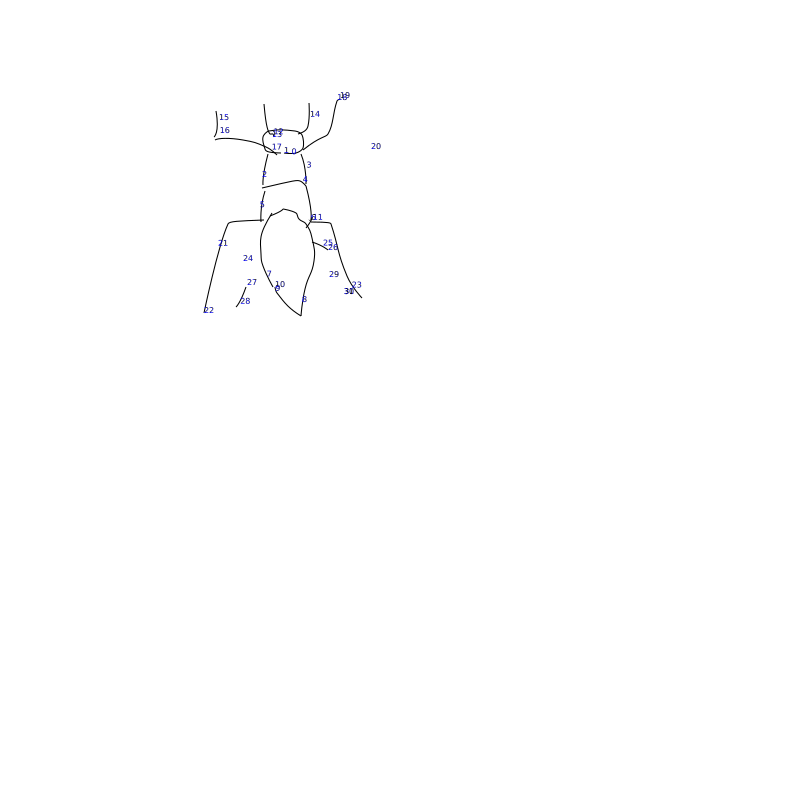

In [3]:
svg = load('assets/svg/ant/286.svg')
display(svg)

In [4]:
line_strings = get_line_strings(map(to_control_points, svg['paths']), step=15)

LINESTRING (270 150, 270 150, 270 150, 255 150, 255 150, 255 150, 255 150, 255 135, 255 135, 255 135, 255 135, 255 135, 255 135, 255 120, 255 120, 255 120, 255 120, 270 120, 270 120, 285 120, 285 120, 285 120, 300 120, 300 135, 300 135, 300 135, 300 135, 300 135, 300 135, 300 135, 285 150, 285 150, 285 150, 285 150, 270 150, 270 150)
<class 'shapely.geometry.linestring.LineString'>
141.21320343559643
0.0


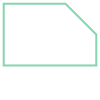

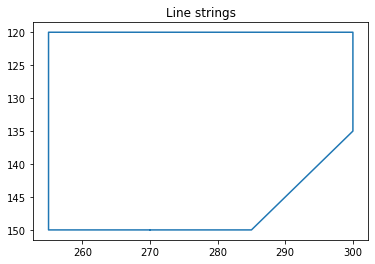

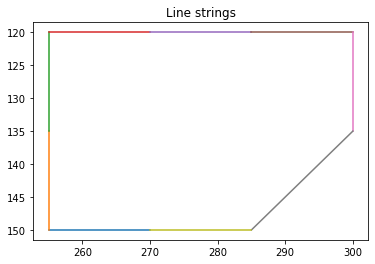

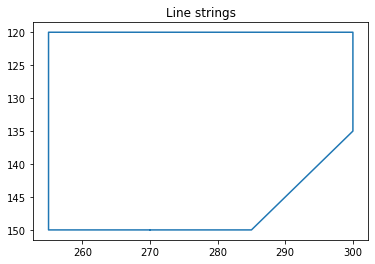

In [5]:
index = 0
ls = line_strings[index]

print(ls)
print(type(ls))
print(ls.length)

s, t = get_endpoints(ls)
print(s.distance(t))

plot_line_strings([ls])

segments = get_segments(ls)

# Plot segmented line string
plot_line_strings(segments)

# Plot closed line string
plot_line_strings([detect_approximate_polygon(ls)])

ls

In [6]:
DEBUG = shapely.MultiLineString(line_strings)

shapely.box(*DEBUG.bounds).area

# 1200.0 vs 70400.0

37125.0

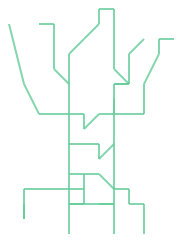

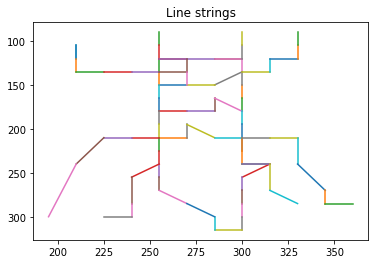

In [7]:
segments = []
for ls in line_strings:
    segments += get_segments(ls) 

# Plot segmented line string
plot_line_strings(segments)

shapely.MultiLineString(segments)

3


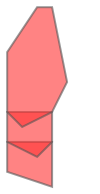

In [8]:
polygons = filter_polygons(get_polygons(line_strings), step=15)

print(len(polygons))

shapely.MultiPolygon(polygons)

### EXTRACTION

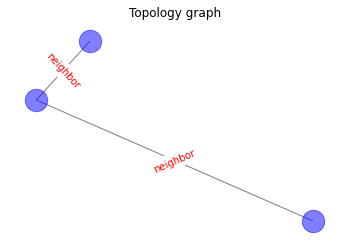

In [9]:
PATHS = map(to_control_points, svg['paths'])

G = extract_graph(PATHS, 'ant', step=15)
plot_graph(G)

G

# DATABASE

## Offline graph extraction

In [12]:
IMAGE_DIRECTORY = os.sep.join(['assets', 'svg'])

def load_svg_files(ext='svg'):
    """
    Returns an iterator that yields the image file paths and their labels.
    """    
    def get_label(path):
        return path.split(os.sep)[-1]
    
    files = []
    
    for r, _, f in os.walk(IMAGE_DIRECTORY):
        for file in f:
            if file.endswith(f'.{ext}'):
                label = get_label(r)
                file_path = os.path.join(r, file)
                
                files.append((file_path, label))
                
    return files


def load_svg_images(files):
    """
    Returns an iterator that yields the image data and their labels.
    """
    for f, l in files:
        print(f)
        yield load(f), l

def extract_graphs(images, step=20):
    """
    Extract all graphs from given images.
    """
    i = 0
    graphs = []
    for img, l in images:
        cp = map(to_control_points,img['paths'])
        
        try:
            graphs.append(extract_graph(cp, l, step=step))
        except StopIteration:
            print('drawing was too small')
        
        print(i)
        i += 1
        
    return graphs

In [13]:
# Extract graphs for each sketch in the dataset, offline processing step

paths = load_svg_files()
print(len(paths))

images = load_svg_images(paths)

graphs = extract_graphs(images, step=20)
print(len(graphs))

20000
assets\svg\airplane\1.svg
0
assets\svg\airplane\10.svg
1
assets\svg\airplane\11.svg
2
assets\svg\airplane\12.svg
3
assets\svg\airplane\13.svg
4
assets\svg\airplane\14.svg
5
assets\svg\airplane\15.svg
6
assets\svg\airplane\16.svg
7
assets\svg\airplane\17.svg
8
assets\svg\airplane\18.svg
9
assets\svg\airplane\19.svg
10
assets\svg\airplane\2.svg
drawing was too small
11
assets\svg\airplane\20.svg
12
assets\svg\airplane\21.svg
13
assets\svg\airplane\22.svg
14
assets\svg\airplane\23.svg
15
assets\svg\airplane\24.svg
16
assets\svg\airplane\25.svg
17
assets\svg\airplane\26.svg
18
assets\svg\airplane\27.svg
19
assets\svg\airplane\28.svg
20
assets\svg\airplane\29.svg
21
assets\svg\airplane\3.svg
22
assets\svg\airplane\30.svg
23
assets\svg\airplane\31.svg
24
assets\svg\airplane\32.svg
25
assets\svg\airplane\33.svg
26
assets\svg\airplane\34.svg
27
assets\svg\airplane\35.svg
28
assets\svg\airplane\36.svg
29
assets\svg\airplane\37.svg
30
assets\svg\airplane\38.svg
31
assets\svg\airplane\39.sv

248
assets\svg\ant\250.svg
drawing was too small
249
assets\svg\ant\251.svg
drawing was too small
250
assets\svg\ant\252.svg
drawing was too small
251
assets\svg\ant\253.svg
252
assets\svg\ant\254.svg
253
assets\svg\ant\255.svg
drawing was too small
254
assets\svg\ant\256.svg
drawing was too small
255
assets\svg\ant\257.svg
drawing was too small
256
assets\svg\ant\258.svg
257
assets\svg\ant\259.svg
drawing was too small
258
assets\svg\ant\260.svg
drawing was too small
259
assets\svg\ant\261.svg
260
assets\svg\ant\262.svg
drawing was too small
261
assets\svg\ant\263.svg
drawing was too small
262
assets\svg\ant\264.svg
263
assets\svg\ant\265.svg
drawing was too small
264
assets\svg\ant\266.svg
265
assets\svg\ant\267.svg
drawing was too small
266
assets\svg\ant\268.svg
drawing was too small
267
assets\svg\ant\269.svg
268
assets\svg\ant\270.svg
drawing was too small
269
assets\svg\ant\271.svg
drawing was too small
270
assets\svg\ant\272.svg
271
assets\svg\ant\273.svg
272
assets\svg\ant\274

476
assets\svg\arm\478.svg
477
assets\svg\arm\479.svg
478
assets\svg\arm\480.svg
479
assets\svg\armchair\481.svg
480
assets\svg\armchair\482.svg
481
assets\svg\armchair\483.svg
482
assets\svg\armchair\484.svg
483
assets\svg\armchair\485.svg
484
assets\svg\armchair\486.svg
485
assets\svg\armchair\487.svg
486
assets\svg\armchair\488.svg
487
assets\svg\armchair\489.svg
488
assets\svg\armchair\490.svg
489
assets\svg\armchair\491.svg
490
assets\svg\armchair\492.svg
drawing was too small
491
assets\svg\armchair\493.svg
492
assets\svg\armchair\494.svg
493
assets\svg\armchair\495.svg
drawing was too small
494
assets\svg\armchair\496.svg
495
assets\svg\armchair\497.svg
496
assets\svg\armchair\498.svg
497
assets\svg\armchair\499.svg
498
assets\svg\armchair\500.svg
499
assets\svg\armchair\501.svg
500
assets\svg\armchair\502.svg
501
assets\svg\armchair\503.svg
502
assets\svg\armchair\504.svg
503
assets\svg\armchair\505.svg
504
assets\svg\armchair\506.svg
505
assets\svg\armchair\507.svg
506
assets\

707
assets\svg\axe\709.svg
708
assets\svg\axe\710.svg
drawing was too small
709
assets\svg\axe\711.svg
drawing was too small
710
assets\svg\axe\712.svg
drawing was too small
711
assets\svg\axe\713.svg
drawing was too small
712
assets\svg\axe\714.svg
713
assets\svg\axe\715.svg
714
assets\svg\axe\716.svg
715
assets\svg\axe\717.svg
716
assets\svg\axe\718.svg
717
assets\svg\axe\719.svg
718
assets\svg\axe\720.svg
719
assets\svg\backpack\721.svg
720
assets\svg\backpack\722.svg
drawing was too small
721
assets\svg\backpack\723.svg
722
assets\svg\backpack\724.svg
723
assets\svg\backpack\725.svg
724
assets\svg\backpack\726.svg
725
assets\svg\backpack\727.svg
726
assets\svg\backpack\728.svg
drawing was too small
727
assets\svg\backpack\729.svg
728
assets\svg\backpack\730.svg
729
assets\svg\backpack\731.svg
drawing was too small
730
assets\svg\backpack\732.svg
731
assets\svg\backpack\733.svg
732
assets\svg\backpack\734.svg
733
assets\svg\backpack\735.svg
drawing was too small
734
assets\svg\backp

943
assets\svg\barn\945.svg
944
assets\svg\barn\946.svg
945
assets\svg\barn\947.svg
946
assets\svg\barn\948.svg
947
assets\svg\barn\949.svg
948
assets\svg\barn\950.svg
949
assets\svg\barn\951.svg
950
assets\svg\barn\952.svg
951
assets\svg\barn\953.svg
952
assets\svg\barn\954.svg
953
assets\svg\barn\955.svg
954
assets\svg\barn\956.svg
955
assets\svg\barn\957.svg
956
assets\svg\barn\958.svg
957
assets\svg\barn\959.svg
958
assets\svg\barn\960.svg
959
assets\svg\baseball bat\1000.svg
960
assets\svg\baseball bat\1001.svg
961
assets\svg\baseball bat\1002.svg
drawing was too small
962
assets\svg\baseball bat\1003.svg
drawing was too small
963
assets\svg\baseball bat\1004.svg
drawing was too small
964
assets\svg\baseball bat\1005.svg
965
assets\svg\baseball bat\1006.svg
966
assets\svg\baseball bat\1007.svg
967
assets\svg\baseball bat\1008.svg
968
assets\svg\baseball bat\1009.svg
drawing was too small
969
assets\svg\baseball bat\1010.svg
970
assets\svg\baseball bat\1011.svg
drawing was too smal

1147
assets\svg\bathtub\1149.svg
1148
assets\svg\bathtub\1150.svg
1149
assets\svg\bathtub\1151.svg
1150
assets\svg\bathtub\1152.svg
1151
assets\svg\bathtub\1153.svg
1152
assets\svg\bathtub\1154.svg
drawing was too small
1153
assets\svg\bathtub\1155.svg
1154
assets\svg\bathtub\1156.svg
1155
assets\svg\bathtub\1157.svg
1156
assets\svg\bathtub\1158.svg
1157
assets\svg\bathtub\1159.svg
1158
assets\svg\bathtub\1160.svg
1159
assets\svg\bathtub\1161.svg
1160
assets\svg\bathtub\1162.svg
1161
assets\svg\bathtub\1163.svg
1162
assets\svg\bathtub\1164.svg
1163
assets\svg\bathtub\1165.svg
1164
assets\svg\bathtub\1166.svg
drawing was too small
1165
assets\svg\bathtub\1167.svg
1166
assets\svg\bathtub\1168.svg
1167
assets\svg\bathtub\1169.svg
1168
assets\svg\bathtub\1170.svg
1169
assets\svg\bathtub\1171.svg
1170
assets\svg\bathtub\1172.svg
1171
assets\svg\bathtub\1173.svg
1172
assets\svg\bathtub\1174.svg
1173
assets\svg\bathtub\1175.svg
1174
assets\svg\bathtub\1176.svg
1175
assets\svg\bathtub\1177.svg

1377
assets\svg\bee\1379.svg
1378
assets\svg\bee\1380.svg
drawing was too small
1379
assets\svg\bee\1381.svg
drawing was too small
1380
assets\svg\bee\1382.svg
drawing was too small
1381
assets\svg\bee\1383.svg
drawing was too small
1382
assets\svg\bee\1384.svg
drawing was too small
1383
assets\svg\bee\1385.svg
1384
assets\svg\bee\1386.svg
drawing was too small
1385
assets\svg\bee\1387.svg
1386
assets\svg\bee\1388.svg
1387
assets\svg\bee\1389.svg
drawing was too small
1388
assets\svg\bee\1390.svg
1389
assets\svg\bee\1391.svg
1390
assets\svg\bee\1392.svg
1391
assets\svg\bee\1393.svg
1392
assets\svg\bee\1394.svg
1393
assets\svg\bee\1395.svg
1394
assets\svg\bee\1396.svg
drawing was too small
1395
assets\svg\bee\1397.svg
1396
assets\svg\bee\1398.svg
1397
assets\svg\bee\1399.svg
drawing was too small
1398
assets\svg\bee\1400.svg
drawing was too small
1399
assets\svg\bee\1401.svg
drawing was too small
1400
assets\svg\bee\1402.svg
1401
assets\svg\bee\1403.svg
drawing was too small
1402
assets

1592
assets\svg\bell\1594.svg
drawing was too small
1593
assets\svg\bell\1595.svg
1594
assets\svg\bell\1596.svg
drawing was too small
1595
assets\svg\bell\1597.svg
1596
assets\svg\bell\1598.svg
1597
assets\svg\bell\1599.svg
1598
assets\svg\bell\1600.svg
drawing was too small
1599
assets\svg\bench\1601.svg
1600
assets\svg\bench\1602.svg
1601
assets\svg\bench\1603.svg
1602
assets\svg\bench\1604.svg
1603
assets\svg\bench\1605.svg
1604
assets\svg\bench\1606.svg
1605
assets\svg\bench\1607.svg
1606
assets\svg\bench\1608.svg
1607
assets\svg\bench\1609.svg
1608
assets\svg\bench\1610.svg
1609
assets\svg\bench\1611.svg
1610
assets\svg\bench\1612.svg
1611
assets\svg\bench\1613.svg
1612
assets\svg\bench\1614.svg
1613
assets\svg\bench\1615.svg
1614
assets\svg\bench\1616.svg
1615
assets\svg\bench\1617.svg
1616
assets\svg\bench\1618.svg
1617
assets\svg\bench\1619.svg
1618
assets\svg\bench\1620.svg
1619
assets\svg\bench\1621.svg
1620
assets\svg\bench\1622.svg
1621
assets\svg\bench\1623.svg
1622
assets

1816
assets\svg\binoculars\1818.svg
1817
assets\svg\binoculars\1819.svg
1818
assets\svg\binoculars\1820.svg
1819
assets\svg\binoculars\1821.svg
1820
assets\svg\binoculars\1822.svg
1821
assets\svg\binoculars\1823.svg
1822
assets\svg\binoculars\1824.svg
1823
assets\svg\binoculars\1825.svg
1824
assets\svg\binoculars\1826.svg
drawing was too small
1825
assets\svg\binoculars\1827.svg
1826
assets\svg\binoculars\1828.svg
1827
assets\svg\binoculars\1829.svg
1828
assets\svg\binoculars\1830.svg
1829
assets\svg\binoculars\1831.svg
1830
assets\svg\binoculars\1832.svg
1831
assets\svg\binoculars\1833.svg
1832
assets\svg\binoculars\1834.svg
1833
assets\svg\binoculars\1835.svg
1834
assets\svg\binoculars\1836.svg
drawing was too small
1835
assets\svg\binoculars\1837.svg
drawing was too small
1836
assets\svg\binoculars\1838.svg
drawing was too small
1837
assets\svg\binoculars\1839.svg
1838
assets\svg\binoculars\1840.svg
1839
assets\svg\blimp\1841.svg
1840
assets\svg\blimp\1842.svg
drawing was too small


2047
assets\svg\bookshelf\2049.svg
2048
assets\svg\bookshelf\2050.svg
2049
assets\svg\bookshelf\2051.svg
2050
assets\svg\bookshelf\2052.svg
2051
assets\svg\bookshelf\2053.svg
2052
assets\svg\bookshelf\2054.svg
2053
assets\svg\bookshelf\2055.svg
2054
assets\svg\bookshelf\2056.svg
2055
assets\svg\bookshelf\2057.svg
2056
assets\svg\bookshelf\2058.svg
2057
assets\svg\bookshelf\2059.svg
2058
assets\svg\bookshelf\2060.svg
2059
assets\svg\bookshelf\2061.svg
2060
assets\svg\bookshelf\2062.svg
2061
assets\svg\bookshelf\2063.svg
2062
assets\svg\bookshelf\2064.svg
2063
assets\svg\bookshelf\2065.svg
2064
assets\svg\bookshelf\2066.svg
2065
assets\svg\bookshelf\2067.svg
2066
assets\svg\bookshelf\2068.svg
2067
assets\svg\bookshelf\2069.svg
2068
assets\svg\bookshelf\2070.svg
2069
assets\svg\bookshelf\2071.svg
2070
assets\svg\bookshelf\2072.svg
2071
assets\svg\bookshelf\2073.svg
2072
assets\svg\bookshelf\2074.svg
2073
assets\svg\bookshelf\2075.svg
2074
assets\svg\bookshelf\2076.svg
2075
assets\svg\book

2237
assets\svg\bottle opener\2239.svg
2238
assets\svg\bottle opener\2240.svg
drawing was too small
2239
assets\svg\bowl\2241.svg
2240
assets\svg\bowl\2242.svg
2241
assets\svg\bowl\2243.svg
drawing was too small
2242
assets\svg\bowl\2244.svg
2243
assets\svg\bowl\2245.svg
2244
assets\svg\bowl\2246.svg
2245
assets\svg\bowl\2247.svg
drawing was too small
2246
assets\svg\bowl\2248.svg
2247
assets\svg\bowl\2249.svg
2248
assets\svg\bowl\2250.svg
drawing was too small
2249
assets\svg\bowl\2251.svg
2250
assets\svg\bowl\2252.svg
2251
assets\svg\bowl\2253.svg
drawing was too small
2252
assets\svg\bowl\2254.svg
2253
assets\svg\bowl\2255.svg
drawing was too small
2254
assets\svg\bowl\2256.svg
drawing was too small
2255
assets\svg\bowl\2257.svg
drawing was too small
2256
assets\svg\bowl\2258.svg
drawing was too small
2257
assets\svg\bowl\2259.svg
drawing was too small
2258
assets\svg\bowl\2260.svg
2259
assets\svg\bowl\2261.svg
drawing was too small
2260
assets\svg\bowl\2262.svg
drawing was too smal

2451
assets\svg\bread\2453.svg
2452
assets\svg\bread\2454.svg
2453
assets\svg\bread\2455.svg
2454
assets\svg\bread\2456.svg
drawing was too small
2455
assets\svg\bread\2457.svg
2456
assets\svg\bread\2458.svg
2457
assets\svg\bread\2459.svg
2458
assets\svg\bread\2460.svg
2459
assets\svg\bread\2461.svg
2460
assets\svg\bread\2462.svg
drawing was too small
2461
assets\svg\bread\2463.svg
drawing was too small
2462
assets\svg\bread\2464.svg
2463
assets\svg\bread\2465.svg
2464
assets\svg\bread\2466.svg
2465
assets\svg\bread\2467.svg
2466
assets\svg\bread\2468.svg
drawing was too small
2467
assets\svg\bread\2469.svg
2468
assets\svg\bread\2470.svg
2469
assets\svg\bread\2471.svg
2470
assets\svg\bread\2472.svg
drawing was too small
2471
assets\svg\bread\2473.svg
drawing was too small
2472
assets\svg\bread\2474.svg
2473
assets\svg\bread\2475.svg
2474
assets\svg\bread\2476.svg
drawing was too small
2475
assets\svg\bread\2477.svg
2476
assets\svg\bread\2478.svg
2477
assets\svg\bread\2479.svg
2478
asse

2697
assets\svg\bus\2699.svg
2698
assets\svg\bus\2700.svg
2699
assets\svg\bus\2701.svg
2700
assets\svg\bus\2702.svg
2701
assets\svg\bus\2703.svg
2702
assets\svg\bus\2704.svg
2703
assets\svg\bus\2705.svg
2704
assets\svg\bus\2706.svg
2705
assets\svg\bus\2707.svg
2706
assets\svg\bus\2708.svg
2707
assets\svg\bus\2709.svg
2708
assets\svg\bus\2710.svg
2709
assets\svg\bus\2711.svg
2710
assets\svg\bus\2712.svg
2711
assets\svg\bus\2713.svg
2712
assets\svg\bus\2714.svg
2713
assets\svg\bus\2715.svg
2714
assets\svg\bus\2716.svg
2715
assets\svg\bus\2717.svg
2716
assets\svg\bus\2718.svg
drawing was too small
2717
assets\svg\bus\2719.svg
2718
assets\svg\bus\2720.svg
2719
assets\svg\bush\2721.svg
drawing was too small
2720
assets\svg\bush\2722.svg
2721
assets\svg\bush\2723.svg
2722
assets\svg\bush\2724.svg
drawing was too small
2723
assets\svg\bush\2725.svg
2724
assets\svg\bush\2726.svg
drawing was too small
2725
assets\svg\bush\2727.svg
2726
assets\svg\bush\2728.svg
2727
assets\svg\bush\2729.svg
2728

2934
assets\svg\cabinet\2936.svg
2935
assets\svg\cabinet\2937.svg
2936
assets\svg\cabinet\2938.svg
2937
assets\svg\cabinet\2939.svg
2938
assets\svg\cabinet\2940.svg
2939
assets\svg\cabinet\2941.svg
2940
assets\svg\cabinet\2942.svg
2941
assets\svg\cabinet\2943.svg
2942
assets\svg\cabinet\2944.svg
2943
assets\svg\cabinet\2945.svg
2944
assets\svg\cabinet\2946.svg
2945
assets\svg\cabinet\2947.svg
2946
assets\svg\cabinet\2948.svg
2947
assets\svg\cabinet\2949.svg
2948
assets\svg\cabinet\2950.svg
2949
assets\svg\cabinet\2951.svg
2950
assets\svg\cabinet\2952.svg
2951
assets\svg\cabinet\2953.svg
2952
assets\svg\cabinet\2954.svg
2953
assets\svg\cabinet\2955.svg
2954
assets\svg\cabinet\2956.svg
drawing was too small
2955
assets\svg\cabinet\2957.svg
2956
assets\svg\cabinet\2958.svg
2957
assets\svg\cabinet\2959.svg
2958
assets\svg\cabinet\2960.svg
2959
assets\svg\cactus\2961.svg
2960
assets\svg\cactus\2962.svg
2961
assets\svg\cactus\2963.svg
2962
assets\svg\cactus\2964.svg
2963
assets\svg\cactus\29

3161
assets\svg\calculator\3163.svg
3162
assets\svg\calculator\3164.svg
3163
assets\svg\calculator\3165.svg
drawing was too small
3164
assets\svg\calculator\3166.svg
drawing was too small
3165
assets\svg\calculator\3167.svg
drawing was too small
3166
assets\svg\calculator\3168.svg
drawing was too small
3167
assets\svg\calculator\3169.svg
3168
assets\svg\calculator\3170.svg
3169
assets\svg\calculator\3171.svg
3170
assets\svg\calculator\3172.svg
drawing was too small
3171
assets\svg\calculator\3173.svg
3172
assets\svg\calculator\3174.svg
3173
assets\svg\calculator\3175.svg
3174
assets\svg\calculator\3176.svg
3175
assets\svg\calculator\3177.svg
3176
assets\svg\calculator\3178.svg
drawing was too small
3177
assets\svg\calculator\3179.svg
3178
assets\svg\calculator\3180.svg
3179
assets\svg\calculator\3181.svg
3180
assets\svg\calculator\3182.svg
3181
assets\svg\calculator\3183.svg
3182
assets\svg\calculator\3184.svg
3183
assets\svg\calculator\3185.svg
drawing was too small
3184
assets\svg\ca

3383
assets\svg\candle\3385.svg
drawing was too small
3384
assets\svg\candle\3386.svg
drawing was too small
3385
assets\svg\candle\3387.svg
3386
assets\svg\candle\3388.svg
drawing was too small
3387
assets\svg\candle\3389.svg
drawing was too small
3388
assets\svg\candle\3390.svg
drawing was too small
3389
assets\svg\candle\3391.svg
3390
assets\svg\candle\3392.svg
drawing was too small
3391
assets\svg\candle\3393.svg
drawing was too small
3392
assets\svg\candle\3394.svg
3393
assets\svg\candle\3395.svg
drawing was too small
3394
assets\svg\candle\3396.svg
3395
assets\svg\candle\3397.svg
drawing was too small
3396
assets\svg\candle\3398.svg
3397
assets\svg\candle\3399.svg
3398
assets\svg\candle\3400.svg
3399
assets\svg\candle\3401.svg
3400
assets\svg\candle\3402.svg
drawing was too small
3401
assets\svg\candle\3403.svg
drawing was too small
3402
assets\svg\candle\3404.svg
drawing was too small
3403
assets\svg\candle\3405.svg
drawing was too small
3404
assets\svg\candle\3406.svg
drawing wa

3597
assets\svg\canoe\3599.svg
3598
assets\svg\canoe\3600.svg
3599
assets\svg\car (sedan)\3601.svg
3600
assets\svg\car (sedan)\3602.svg
3601
assets\svg\car (sedan)\3603.svg
3602
assets\svg\car (sedan)\3604.svg
3603
assets\svg\car (sedan)\3605.svg
3604
assets\svg\car (sedan)\3606.svg
3605
assets\svg\car (sedan)\3607.svg
3606
assets\svg\car (sedan)\3608.svg
3607
assets\svg\car (sedan)\3609.svg
3608
assets\svg\car (sedan)\3610.svg
3609
assets\svg\car (sedan)\3611.svg
3610
assets\svg\car (sedan)\3612.svg
3611
assets\svg\car (sedan)\3613.svg
drawing was too small
3612
assets\svg\car (sedan)\3614.svg
3613
assets\svg\car (sedan)\3615.svg
drawing was too small
3614
assets\svg\car (sedan)\3616.svg
3615
assets\svg\car (sedan)\3617.svg
3616
assets\svg\car (sedan)\3618.svg
drawing was too small
3617
assets\svg\car (sedan)\3619.svg
3618
assets\svg\car (sedan)\3620.svg
3619
assets\svg\car (sedan)\3621.svg
3620
assets\svg\car (sedan)\3622.svg
3621
assets\svg\car (sedan)\3623.svg
3622
assets\svg\car (

3820
assets\svg\castle\3822.svg
3821
assets\svg\castle\3823.svg
3822
assets\svg\castle\3824.svg
3823
assets\svg\castle\3825.svg
3824
assets\svg\castle\3826.svg
3825
assets\svg\castle\3827.svg
3826
assets\svg\castle\3828.svg
3827
assets\svg\castle\3829.svg
3828
assets\svg\castle\3830.svg
3829
assets\svg\castle\3831.svg
3830
assets\svg\castle\3832.svg
3831
assets\svg\castle\3833.svg
3832
assets\svg\castle\3834.svg
3833
assets\svg\castle\3835.svg
3834
assets\svg\castle\3836.svg
3835
assets\svg\castle\3837.svg
3836
assets\svg\castle\3838.svg
3837
assets\svg\castle\3839.svg
3838
assets\svg\castle\3840.svg
3839
assets\svg\cat\3841.svg
3840
assets\svg\cat\3842.svg
3841
assets\svg\cat\3843.svg
3842
assets\svg\cat\3844.svg
3843
assets\svg\cat\3845.svg
drawing was too small
3844
assets\svg\cat\3846.svg
3845
assets\svg\cat\3847.svg
3846
assets\svg\cat\3848.svg
3847
assets\svg\cat\3849.svg
3848
assets\svg\cat\3850.svg
3849
assets\svg\cat\3851.svg
3850
assets\svg\cat\3852.svg
3851
assets\svg\cat\38

4035
assets\svg\chair\4037.svg
4036
assets\svg\chair\4038.svg
4037
assets\svg\chair\4039.svg
4038
assets\svg\chair\4040.svg
drawing was too small
4039
assets\svg\chair\4041.svg
drawing was too small
4040
assets\svg\chair\4042.svg
drawing was too small
4041
assets\svg\chair\4043.svg
drawing was too small
4042
assets\svg\chair\4044.svg
4043
assets\svg\chair\4045.svg
4044
assets\svg\chair\4046.svg
4045
assets\svg\chair\4047.svg
drawing was too small
4046
assets\svg\chair\4048.svg
4047
assets\svg\chair\4049.svg
4048
assets\svg\chair\4050.svg
4049
assets\svg\chair\4051.svg
4050
assets\svg\chair\4052.svg
4051
assets\svg\chair\4053.svg
4052
assets\svg\chair\4054.svg
4053
assets\svg\chair\4055.svg
4054
assets\svg\chair\4056.svg
drawing was too small
4055
assets\svg\chair\4057.svg
drawing was too small
4056
assets\svg\chair\4058.svg
4057
assets\svg\chair\4059.svg
4058
assets\svg\chair\4060.svg
4059
assets\svg\chair\4061.svg
4060
assets\svg\chair\4062.svg
4061
assets\svg\chair\4063.svg
4062
asse

4258
assets\svg\cigarette\4260.svg
4259
assets\svg\cigarette\4261.svg
4260
assets\svg\cigarette\4262.svg
4261
assets\svg\cigarette\4263.svg
4262
assets\svg\cigarette\4264.svg
drawing was too small
4263
assets\svg\cigarette\4265.svg
drawing was too small
4264
assets\svg\cigarette\4266.svg
drawing was too small
4265
assets\svg\cigarette\4267.svg
drawing was too small
4266
assets\svg\cigarette\4268.svg
drawing was too small
4267
assets\svg\cigarette\4269.svg
4268
assets\svg\cigarette\4270.svg
4269
assets\svg\cigarette\4271.svg
drawing was too small
4270
assets\svg\cigarette\4272.svg
4271
assets\svg\cigarette\4273.svg
4272
assets\svg\cigarette\4274.svg
4273
assets\svg\cigarette\4275.svg
drawing was too small
4274
assets\svg\cigarette\4276.svg
drawing was too small
4275
assets\svg\cigarette\4277.svg
drawing was too small
4276
assets\svg\cigarette\4278.svg
4277
assets\svg\cigarette\4279.svg
4278
assets\svg\cigarette\4280.svg
4279
assets\svg\cigarette\4281.svg
4280
assets\svg\cigarette\4282.s

4472
assets\svg\comb\4474.svg
4473
assets\svg\comb\4475.svg
drawing was too small
4474
assets\svg\comb\4476.svg
4475
assets\svg\comb\4477.svg
4476
assets\svg\comb\4478.svg
drawing was too small
4477
assets\svg\comb\4479.svg
4478
assets\svg\comb\4480.svg
drawing was too small
4479
assets\svg\computer monitor\4481.svg
drawing was too small
4480
assets\svg\computer monitor\4482.svg
4481
assets\svg\computer monitor\4483.svg
4482
assets\svg\computer monitor\4484.svg
4483
assets\svg\computer monitor\4485.svg
4484
assets\svg\computer monitor\4486.svg
4485
assets\svg\computer monitor\4487.svg
drawing was too small
4486
assets\svg\computer monitor\4488.svg
4487
assets\svg\computer monitor\4489.svg
4488
assets\svg\computer monitor\4490.svg
drawing was too small
4489
assets\svg\computer monitor\4491.svg
4490
assets\svg\computer monitor\4492.svg
4491
assets\svg\computer monitor\4493.svg
4492
assets\svg\computer monitor\4494.svg
4493
assets\svg\computer monitor\4495.svg
4494
assets\svg\computer mon

4661
assets\svg\couch\4663.svg
4662
assets\svg\couch\4664.svg
4663
assets\svg\couch\4665.svg
4664
assets\svg\couch\4666.svg
4665
assets\svg\couch\4667.svg
4666
assets\svg\couch\4668.svg
4667
assets\svg\couch\4669.svg
4668
assets\svg\couch\4670.svg
4669
assets\svg\couch\4671.svg
4670
assets\svg\couch\4672.svg
4671
assets\svg\couch\4673.svg
4672
assets\svg\couch\4674.svg
4673
assets\svg\couch\4675.svg
4674
assets\svg\couch\4676.svg
4675
assets\svg\couch\4677.svg
4676
assets\svg\couch\4678.svg
4677
assets\svg\couch\4679.svg
4678
assets\svg\couch\4680.svg
4679
assets\svg\couch\4681.svg
4680
assets\svg\couch\4682.svg
4681
assets\svg\couch\4683.svg
4682
assets\svg\couch\4684.svg
4683
assets\svg\couch\4685.svg
4684
assets\svg\couch\4686.svg
4685
assets\svg\couch\4687.svg
4686
assets\svg\couch\4688.svg
4687
assets\svg\couch\4689.svg
4688
assets\svg\couch\4690.svg
4689
assets\svg\couch\4691.svg
4690
assets\svg\couch\4692.svg
4691
assets\svg\couch\4693.svg
4692
assets\svg\couch\4694.svg
4693
ass

4913
assets\svg\crane (machine)\4915.svg
4914
assets\svg\crane (machine)\4916.svg
4915
assets\svg\crane (machine)\4917.svg
4916
assets\svg\crane (machine)\4918.svg
4917
assets\svg\crane (machine)\4919.svg
4918
assets\svg\crane (machine)\4920.svg
4919
assets\svg\crane (machine)\4921.svg
4920
assets\svg\crane (machine)\4922.svg
4921
assets\svg\crane (machine)\4923.svg
4922
assets\svg\crane (machine)\4924.svg
4923
assets\svg\crane (machine)\4925.svg
4924
assets\svg\crane (machine)\4926.svg
4925
assets\svg\crane (machine)\4927.svg
4926
assets\svg\crane (machine)\4928.svg
4927
assets\svg\crane (machine)\4929.svg
4928
assets\svg\crane (machine)\4930.svg
4929
assets\svg\crane (machine)\4931.svg
4930
assets\svg\crane (machine)\4932.svg
4931
assets\svg\crane (machine)\4933.svg
4932
assets\svg\crane (machine)\4934.svg
drawing was too small
4933
assets\svg\crane (machine)\4935.svg
4934
assets\svg\crane (machine)\4936.svg
4935
assets\svg\crane (machine)\4937.svg
4936
assets\svg\crane (machine)\493

5136
assets\svg\cup\5138.svg
5137
assets\svg\cup\5139.svg
5138
assets\svg\cup\5140.svg
5139
assets\svg\cup\5141.svg
5140
assets\svg\cup\5142.svg
drawing was too small
5141
assets\svg\cup\5143.svg
5142
assets\svg\cup\5144.svg
drawing was too small
5143
assets\svg\cup\5145.svg
drawing was too small
5144
assets\svg\cup\5146.svg
5145
assets\svg\cup\5147.svg
5146
assets\svg\cup\5148.svg
5147
assets\svg\cup\5149.svg
drawing was too small
5148
assets\svg\cup\5150.svg
5149
assets\svg\cup\5151.svg
5150
assets\svg\cup\5152.svg
drawing was too small
5151
assets\svg\cup\5153.svg
5152
assets\svg\cup\5154.svg
drawing was too small
5153
assets\svg\cup\5155.svg
5154
assets\svg\cup\5156.svg
drawing was too small
5155
assets\svg\cup\5157.svg
drawing was too small
5156
assets\svg\cup\5158.svg
drawing was too small
5157
assets\svg\cup\5159.svg
5158
assets\svg\cup\5160.svg
drawing was too small
5159
assets\svg\cup\5161.svg
drawing was too small
5160
assets\svg\cup\5162.svg
drawing was too small
5161
assets

5352
assets\svg\dog\5354.svg
drawing was too small
5353
assets\svg\dog\5355.svg
5354
assets\svg\dog\5356.svg
5355
assets\svg\dog\5357.svg
5356
assets\svg\dog\5358.svg
5357
assets\svg\dog\5359.svg
5358
assets\svg\dog\5360.svg
5359
assets\svg\dolphin\5361.svg
5360
assets\svg\dolphin\5362.svg
5361
assets\svg\dolphin\5363.svg
drawing was too small
5362
assets\svg\dolphin\5364.svg
5363
assets\svg\dolphin\5365.svg
5364
assets\svg\dolphin\5366.svg
5365
assets\svg\dolphin\5367.svg
drawing was too small
5366
assets\svg\dolphin\5368.svg
5367
assets\svg\dolphin\5369.svg
5368
assets\svg\dolphin\5370.svg
5369
assets\svg\dolphin\5371.svg
5370
assets\svg\dolphin\5372.svg
5371
assets\svg\dolphin\5373.svg
5372
assets\svg\dolphin\5374.svg
5373
assets\svg\dolphin\5375.svg
5374
assets\svg\dolphin\5376.svg
5375
assets\svg\dolphin\5377.svg
5376
assets\svg\dolphin\5378.svg
5377
assets\svg\dolphin\5379.svg
5378
assets\svg\dolphin\5380.svg
5379
assets\svg\dolphin\5381.svg
5380
assets\svg\dolphin\5382.svg
5381


5586
assets\svg\door\5588.svg
5587
assets\svg\door\5589.svg
5588
assets\svg\door\5590.svg
5589
assets\svg\door\5591.svg
5590
assets\svg\door\5592.svg
5591
assets\svg\door\5593.svg
5592
assets\svg\door\5594.svg
5593
assets\svg\door\5595.svg
5594
assets\svg\door\5596.svg
drawing was too small
5595
assets\svg\door\5597.svg
5596
assets\svg\door\5598.svg
5597
assets\svg\door\5599.svg
5598
assets\svg\door\5600.svg
5599
assets\svg\door handle\5601.svg
drawing was too small
5600
assets\svg\door handle\5602.svg
drawing was too small
5601
assets\svg\door handle\5603.svg
drawing was too small
5602
assets\svg\door handle\5604.svg
5603
assets\svg\door handle\5605.svg
5604
assets\svg\door handle\5606.svg
drawing was too small
5605
assets\svg\door handle\5607.svg
5606
assets\svg\door handle\5608.svg
drawing was too small
5607
assets\svg\door handle\5609.svg
drawing was too small
5608
assets\svg\door handle\5610.svg
5609
assets\svg\door handle\5611.svg
5610
assets\svg\door handle\5612.svg
5611
assets\

5804
assets\svg\duck\5806.svg
5805
assets\svg\duck\5807.svg
5806
assets\svg\duck\5808.svg
5807
assets\svg\duck\5809.svg
5808
assets\svg\duck\5810.svg
5809
assets\svg\duck\5811.svg
5810
assets\svg\duck\5812.svg
5811
assets\svg\duck\5813.svg
5812
assets\svg\duck\5814.svg
5813
assets\svg\duck\5815.svg
5814
assets\svg\duck\5816.svg
5815
assets\svg\duck\5817.svg
5816
assets\svg\duck\5818.svg
5817
assets\svg\duck\5819.svg
5818
assets\svg\duck\5820.svg
5819
assets\svg\duck\5821.svg
5820
assets\svg\duck\5822.svg
5821
assets\svg\duck\5823.svg
5822
assets\svg\duck\5824.svg
5823
assets\svg\duck\5825.svg
5824
assets\svg\duck\5826.svg
5825
assets\svg\duck\5827.svg
5826
assets\svg\duck\5828.svg
5827
assets\svg\duck\5829.svg
drawing was too small
5828
assets\svg\duck\5830.svg
5829
assets\svg\duck\5831.svg
5830
assets\svg\duck\5832.svg
5831
assets\svg\duck\5833.svg
5832
assets\svg\duck\5834.svg
5833
assets\svg\duck\5835.svg
5834
assets\svg\duck\5836.svg
5835
assets\svg\duck\5837.svg
5836
assets\svg\du

6027
assets\svg\envelope\6029.svg
drawing was too small
6028
assets\svg\envelope\6030.svg
6029
assets\svg\envelope\6031.svg
drawing was too small
6030
assets\svg\envelope\6032.svg
6031
assets\svg\envelope\6033.svg
6032
assets\svg\envelope\6034.svg
6033
assets\svg\envelope\6035.svg
6034
assets\svg\envelope\6036.svg
drawing was too small
6035
assets\svg\envelope\6037.svg
6036
assets\svg\envelope\6038.svg
drawing was too small
6037
assets\svg\envelope\6039.svg
6038
assets\svg\envelope\6040.svg
drawing was too small
6039
assets\svg\envelope\6041.svg
drawing was too small
6040
assets\svg\envelope\6042.svg
drawing was too small
6041
assets\svg\envelope\6043.svg
6042
assets\svg\envelope\6044.svg
6043
assets\svg\envelope\6045.svg
drawing was too small
6044
assets\svg\envelope\6046.svg
drawing was too small
6045
assets\svg\envelope\6047.svg
drawing was too small
6046
assets\svg\envelope\6048.svg
6047
assets\svg\envelope\6049.svg
6048
assets\svg\envelope\6050.svg
6049
assets\svg\envelope\6051.sv

drawing was too small
6221
assets\svg\eyeglasses\6223.svg
6222
assets\svg\eyeglasses\6224.svg
6223
assets\svg\eyeglasses\6225.svg
drawing was too small
6224
assets\svg\eyeglasses\6226.svg
6225
assets\svg\eyeglasses\6227.svg
drawing was too small
6226
assets\svg\eyeglasses\6228.svg
6227
assets\svg\eyeglasses\6229.svg
drawing was too small
6228
assets\svg\eyeglasses\6230.svg
6229
assets\svg\eyeglasses\6231.svg
6230
assets\svg\eyeglasses\6232.svg
6231
assets\svg\eyeglasses\6233.svg
drawing was too small
6232
assets\svg\eyeglasses\6234.svg
6233
assets\svg\eyeglasses\6235.svg
drawing was too small
6234
assets\svg\eyeglasses\6236.svg
6235
assets\svg\eyeglasses\6237.svg
6236
assets\svg\eyeglasses\6238.svg
6237
assets\svg\eyeglasses\6239.svg
6238
assets\svg\eyeglasses\6240.svg
6239
assets\svg\face\6241.svg
6240
assets\svg\face\6242.svg
6241
assets\svg\face\6243.svg
6242
assets\svg\face\6244.svg
drawing was too small
6243
assets\svg\face\6245.svg
6244
assets\svg\face\6246.svg
6245
assets\svg\fa

6456
assets\svg\feather\6458.svg
6457
assets\svg\feather\6459.svg
drawing was too small
6458
assets\svg\feather\6460.svg
drawing was too small
6459
assets\svg\feather\6461.svg
6460
assets\svg\feather\6462.svg
6461
assets\svg\feather\6463.svg
6462
assets\svg\feather\6464.svg
6463
assets\svg\feather\6465.svg
6464
assets\svg\feather\6466.svg
drawing was too small
6465
assets\svg\feather\6467.svg
drawing was too small
6466
assets\svg\feather\6468.svg
6467
assets\svg\feather\6469.svg
drawing was too small
6468
assets\svg\feather\6470.svg
6469
assets\svg\feather\6471.svg
6470
assets\svg\feather\6472.svg
6471
assets\svg\feather\6473.svg
6472
assets\svg\feather\6474.svg
6473
assets\svg\feather\6475.svg
drawing was too small
6474
assets\svg\feather\6476.svg
6475
assets\svg\feather\6477.svg
6476
assets\svg\feather\6478.svg
6477
assets\svg\feather\6479.svg
6478
assets\svg\feather\6480.svg
6479
assets\svg\fire hydrant\6481.svg
6480
assets\svg\fire hydrant\6482.svg
6481
assets\svg\fire hydrant\6483

6669
assets\svg\flashlight\6671.svg
6670
assets\svg\flashlight\6672.svg
6671
assets\svg\flashlight\6673.svg
6672
assets\svg\flashlight\6674.svg
6673
assets\svg\flashlight\6675.svg
6674
assets\svg\flashlight\6676.svg
6675
assets\svg\flashlight\6677.svg
drawing was too small
6676
assets\svg\flashlight\6678.svg
6677
assets\svg\flashlight\6679.svg
6678
assets\svg\flashlight\6680.svg
drawing was too small
6679
assets\svg\flashlight\6681.svg
6680
assets\svg\flashlight\6682.svg
6681
assets\svg\flashlight\6683.svg
drawing was too small
6682
assets\svg\flashlight\6684.svg
drawing was too small
6683
assets\svg\flashlight\6685.svg
drawing was too small
6684
assets\svg\flashlight\6686.svg
drawing was too small
6685
assets\svg\flashlight\6687.svg
6686
assets\svg\flashlight\6688.svg
6687
assets\svg\flashlight\6689.svg
6688
assets\svg\flashlight\6690.svg
drawing was too small
6689
assets\svg\flashlight\6691.svg
6690
assets\svg\flashlight\6692.svg
6691
assets\svg\flashlight\6693.svg
6692
assets\svg\fl

6864
assets\svg\flower with stem\6866.svg
6865
assets\svg\flower with stem\6867.svg
6866
assets\svg\flower with stem\6868.svg
6867
assets\svg\flower with stem\6869.svg
6868
assets\svg\flower with stem\6870.svg
6869
assets\svg\flower with stem\6871.svg
6870
assets\svg\flower with stem\6872.svg
6871
assets\svg\flower with stem\6873.svg
6872
assets\svg\flower with stem\6874.svg
6873
assets\svg\flower with stem\6875.svg
6874
assets\svg\flower with stem\6876.svg
6875
assets\svg\flower with stem\6877.svg
drawing was too small
6876
assets\svg\flower with stem\6878.svg
6877
assets\svg\flower with stem\6879.svg
6878
assets\svg\flower with stem\6880.svg
drawing was too small
6879
assets\svg\flying bird\6881.svg
drawing was too small
6880
assets\svg\flying bird\6882.svg
drawing was too small
6881
assets\svg\flying bird\6883.svg
6882
assets\svg\flying bird\6884.svg
drawing was too small
6883
assets\svg\flying bird\6885.svg
drawing was too small
6884
assets\svg\flying bird\6886.svg
6885
assets\svg\

7055
assets\svg\foot\7057.svg
7056
assets\svg\foot\7058.svg
7057
assets\svg\foot\7059.svg
drawing was too small
7058
assets\svg\foot\7060.svg
drawing was too small
7059
assets\svg\foot\7061.svg
drawing was too small
7060
assets\svg\foot\7062.svg
drawing was too small
7061
assets\svg\foot\7063.svg
7062
assets\svg\foot\7064.svg
7063
assets\svg\foot\7065.svg
drawing was too small
7064
assets\svg\foot\7066.svg
drawing was too small
7065
assets\svg\foot\7067.svg
drawing was too small
7066
assets\svg\foot\7068.svg
7067
assets\svg\foot\7069.svg
drawing was too small
7068
assets\svg\foot\7070.svg
7069
assets\svg\foot\7071.svg
drawing was too small
7070
assets\svg\foot\7072.svg
7071
assets\svg\foot\7073.svg
7072
assets\svg\foot\7074.svg
7073
assets\svg\foot\7075.svg
drawing was too small
7074
assets\svg\foot\7076.svg
drawing was too small
7075
assets\svg\foot\7077.svg
drawing was too small
7076
assets\svg\foot\7078.svg
drawing was too small
7077
assets\svg\foot\7079.svg
drawing was too small
70

7270
assets\svg\frog\7272.svg
drawing was too small
7271
assets\svg\frog\7273.svg
7272
assets\svg\frog\7274.svg
7273
assets\svg\frog\7275.svg
drawing was too small
7274
assets\svg\frog\7276.svg
7275
assets\svg\frog\7277.svg
7276
assets\svg\frog\7278.svg
7277
assets\svg\frog\7279.svg
7278
assets\svg\frog\7280.svg
7279
assets\svg\frying-pan\7281.svg
7280
assets\svg\frying-pan\7282.svg
7281
assets\svg\frying-pan\7283.svg
7282
assets\svg\frying-pan\7284.svg
7283
assets\svg\frying-pan\7285.svg
7284
assets\svg\frying-pan\7286.svg
drawing was too small
7285
assets\svg\frying-pan\7287.svg
7286
assets\svg\frying-pan\7288.svg
drawing was too small
7287
assets\svg\frying-pan\7289.svg
drawing was too small
7288
assets\svg\frying-pan\7290.svg
drawing was too small
7289
assets\svg\frying-pan\7291.svg
drawing was too small
7290
assets\svg\frying-pan\7292.svg
7291
assets\svg\frying-pan\7293.svg
drawing was too small
7292
assets\svg\frying-pan\7294.svg
drawing was too small
7293
assets\svg\frying-pan\7

7483
assets\svg\grapes\7485.svg
7484
assets\svg\grapes\7486.svg
7485
assets\svg\grapes\7487.svg
drawing was too small
7486
assets\svg\grapes\7488.svg
7487
assets\svg\grapes\7489.svg
7488
assets\svg\grapes\7490.svg
7489
assets\svg\grapes\7491.svg
7490
assets\svg\grapes\7492.svg
7491
assets\svg\grapes\7493.svg
drawing was too small
7492
assets\svg\grapes\7494.svg
7493
assets\svg\grapes\7495.svg
7494
assets\svg\grapes\7496.svg
drawing was too small
7495
assets\svg\grapes\7497.svg
7496
assets\svg\grapes\7498.svg
7497
assets\svg\grapes\7499.svg
7498
assets\svg\grapes\7500.svg
7499
assets\svg\grapes\7501.svg
7500
assets\svg\grapes\7502.svg
7501
assets\svg\grapes\7503.svg
drawing was too small
7502
assets\svg\grapes\7504.svg
7503
assets\svg\grapes\7505.svg
7504
assets\svg\grapes\7506.svg
7505
assets\svg\grapes\7507.svg
7506
assets\svg\grapes\7508.svg
drawing was too small
7507
assets\svg\grapes\7509.svg
7508
assets\svg\grapes\7510.svg
drawing was too small
7509
assets\svg\grapes\7511.svg
7510

7700
assets\svg\hamburger\7702.svg
drawing was too small
7701
assets\svg\hamburger\7703.svg
7702
assets\svg\hamburger\7704.svg
7703
assets\svg\hamburger\7705.svg
7704
assets\svg\hamburger\7706.svg
7705
assets\svg\hamburger\7707.svg
7706
assets\svg\hamburger\7708.svg
7707
assets\svg\hamburger\7709.svg
7708
assets\svg\hamburger\7710.svg
7709
assets\svg\hamburger\7711.svg
7710
assets\svg\hamburger\7712.svg
7711
assets\svg\hamburger\7713.svg
7712
assets\svg\hamburger\7714.svg
7713
assets\svg\hamburger\7715.svg
drawing was too small
7714
assets\svg\hamburger\7716.svg
7715
assets\svg\hamburger\7717.svg
drawing was too small
7716
assets\svg\hamburger\7718.svg
7717
assets\svg\hamburger\7719.svg
7718
assets\svg\hamburger\7720.svg
7719
assets\svg\hamburger\7721.svg
7720
assets\svg\hamburger\7722.svg
7721
assets\svg\hamburger\7723.svg
7722
assets\svg\hamburger\7724.svg
drawing was too small
7723
assets\svg\hamburger\7725.svg
7724
assets\svg\hamburger\7726.svg
drawing was too small
7725
assets\svg

7906
assets\svg\hand\7908.svg
7907
assets\svg\hand\7909.svg
7908
assets\svg\hand\7910.svg
drawing was too small
7909
assets\svg\hand\7911.svg
7910
assets\svg\hand\7912.svg
7911
assets\svg\hand\7913.svg
7912
assets\svg\hand\7914.svg
drawing was too small
7913
assets\svg\hand\7915.svg
7914
assets\svg\hand\7916.svg
7915
assets\svg\hand\7917.svg
7916
assets\svg\hand\7918.svg
7917
assets\svg\hand\7919.svg
7918
assets\svg\hand\7920.svg
7919
assets\svg\harp\7921.svg
7920
assets\svg\harp\7922.svg
7921
assets\svg\harp\7923.svg
7922
assets\svg\harp\7924.svg
7923
assets\svg\harp\7925.svg
7924
assets\svg\harp\7926.svg
7925
assets\svg\harp\7927.svg
7926
assets\svg\harp\7928.svg
7927
assets\svg\harp\7929.svg
drawing was too small
7928
assets\svg\harp\7930.svg
7929
assets\svg\harp\7931.svg
7930
assets\svg\harp\7932.svg
7931
assets\svg\harp\7933.svg
drawing was too small
7932
assets\svg\harp\7934.svg
7933
assets\svg\harp\7935.svg
7934
assets\svg\harp\7936.svg
7935
assets\svg\harp\7937.svg
7936
assets\

8137
assets\svg\head\8139.svg
8138
assets\svg\head\8140.svg
8139
assets\svg\head\8141.svg
8140
assets\svg\head\8142.svg
drawing was too small
8141
assets\svg\head\8143.svg
drawing was too small
8142
assets\svg\head\8144.svg
8143
assets\svg\head\8145.svg
drawing was too small
8144
assets\svg\head\8146.svg
8145
assets\svg\head\8147.svg
8146
assets\svg\head\8148.svg
drawing was too small
8147
assets\svg\head\8149.svg
drawing was too small
8148
assets\svg\head\8150.svg
drawing was too small
8149
assets\svg\head\8151.svg
8150
assets\svg\head\8152.svg
drawing was too small
8151
assets\svg\head\8153.svg
drawing was too small
8152
assets\svg\head\8154.svg
drawing was too small
8153
assets\svg\head\8155.svg
8154
assets\svg\head\8156.svg
8155
assets\svg\head\8157.svg
drawing was too small
8156
assets\svg\head\8158.svg
drawing was too small
8157
assets\svg\head\8159.svg
drawing was too small
8158
assets\svg\head\8160.svg
drawing was too small
8159
assets\svg\head-phones\8161.svg
8160
assets\svg\h

8342
assets\svg\helicopter\8344.svg
8343
assets\svg\helicopter\8345.svg
8344
assets\svg\helicopter\8346.svg
8345
assets\svg\helicopter\8347.svg
8346
assets\svg\helicopter\8348.svg
8347
assets\svg\helicopter\8349.svg
8348
assets\svg\helicopter\8350.svg
drawing was too small
8349
assets\svg\helicopter\8351.svg
8350
assets\svg\helicopter\8352.svg
8351
assets\svg\helicopter\8353.svg
8352
assets\svg\helicopter\8354.svg
8353
assets\svg\helicopter\8355.svg
8354
assets\svg\helicopter\8356.svg
8355
assets\svg\helicopter\8357.svg
8356
assets\svg\helicopter\8358.svg
8357
assets\svg\helicopter\8359.svg
8358
assets\svg\helicopter\8360.svg
8359
assets\svg\helicopter\8361.svg
8360
assets\svg\helicopter\8362.svg
8361
assets\svg\helicopter\8363.svg
8362
assets\svg\helicopter\8364.svg
8363
assets\svg\helicopter\8365.svg
8364
assets\svg\helicopter\8366.svg
8365
assets\svg\helicopter\8367.svg
8366
assets\svg\helicopter\8368.svg
8367
assets\svg\helicopter\8369.svg
8368
assets\svg\helicopter\8370.svg
8369
a

8568
assets\svg\hot air balloon\8570.svg
8569
assets\svg\hot air balloon\8571.svg
8570
assets\svg\hot air balloon\8572.svg
8571
assets\svg\hot air balloon\8573.svg
8572
assets\svg\hot air balloon\8574.svg
8573
assets\svg\hot air balloon\8575.svg
8574
assets\svg\hot air balloon\8576.svg
8575
assets\svg\hot air balloon\8577.svg
8576
assets\svg\hot air balloon\8578.svg
8577
assets\svg\hot air balloon\8579.svg
8578
assets\svg\hot air balloon\8580.svg
8579
assets\svg\hot air balloon\8581.svg
8580
assets\svg\hot air balloon\8582.svg
8581
assets\svg\hot air balloon\8583.svg
8582
assets\svg\hot air balloon\8584.svg
8583
assets\svg\hot air balloon\8585.svg
8584
assets\svg\hot air balloon\8586.svg
8585
assets\svg\hot air balloon\8587.svg
8586
assets\svg\hot air balloon\8588.svg
8587
assets\svg\hot air balloon\8589.svg
8588
assets\svg\hot air balloon\8590.svg
drawing was too small
8589
assets\svg\hot air balloon\8591.svg
8590
assets\svg\hot air balloon\8592.svg
8591
assets\svg\hot air balloon\859

8766
assets\svg\hourglass\8768.svg
8767
assets\svg\hourglass\8769.svg
8768
assets\svg\hourglass\8770.svg
8769
assets\svg\hourglass\8771.svg
drawing was too small
8770
assets\svg\hourglass\8772.svg
drawing was too small
8771
assets\svg\hourglass\8773.svg
drawing was too small
8772
assets\svg\hourglass\8774.svg
drawing was too small
8773
assets\svg\hourglass\8775.svg
8774
assets\svg\hourglass\8776.svg
8775
assets\svg\hourglass\8777.svg
drawing was too small
8776
assets\svg\hourglass\8778.svg
8777
assets\svg\hourglass\8779.svg
8778
assets\svg\hourglass\8780.svg
8779
assets\svg\hourglass\8781.svg
drawing was too small
8780
assets\svg\hourglass\8782.svg
8781
assets\svg\hourglass\8783.svg
8782
assets\svg\hourglass\8784.svg
8783
assets\svg\hourglass\8785.svg
drawing was too small
8784
assets\svg\hourglass\8786.svg
8785
assets\svg\hourglass\8787.svg
8786
assets\svg\hourglass\8788.svg
drawing was too small
8787
assets\svg\hourglass\8789.svg
8788
assets\svg\hourglass\8790.svg
drawing was too sma

8979
assets\svg\ice-cream-cone\8981.svg
8980
assets\svg\ice-cream-cone\8982.svg
drawing was too small
8981
assets\svg\ice-cream-cone\8983.svg
8982
assets\svg\ice-cream-cone\8984.svg
8983
assets\svg\ice-cream-cone\8985.svg
8984
assets\svg\ice-cream-cone\8986.svg
8985
assets\svg\ice-cream-cone\8987.svg
drawing was too small
8986
assets\svg\ice-cream-cone\8988.svg
drawing was too small
8987
assets\svg\ice-cream-cone\8989.svg
drawing was too small
8988
assets\svg\ice-cream-cone\8990.svg
8989
assets\svg\ice-cream-cone\8991.svg
8990
assets\svg\ice-cream-cone\8992.svg
8991
assets\svg\ice-cream-cone\8993.svg
8992
assets\svg\ice-cream-cone\8994.svg
8993
assets\svg\ice-cream-cone\8995.svg
8994
assets\svg\ice-cream-cone\8996.svg
8995
assets\svg\ice-cream-cone\8997.svg
8996
assets\svg\ice-cream-cone\8998.svg
drawing was too small
8997
assets\svg\ice-cream-cone\8999.svg
8998
assets\svg\ice-cream-cone\9000.svg
8999
assets\svg\ice-cream-cone\9001.svg
drawing was too small
9000
assets\svg\ice-cream-co

9194
assets\svg\kangaroo\9196.svg
9195
assets\svg\kangaroo\9197.svg
9196
assets\svg\kangaroo\9198.svg
9197
assets\svg\kangaroo\9199.svg
9198
assets\svg\kangaroo\9200.svg
9199
assets\svg\key\9201.svg
9200
assets\svg\key\9202.svg
drawing was too small
9201
assets\svg\key\9203.svg
drawing was too small
9202
assets\svg\key\9204.svg
9203
assets\svg\key\9205.svg
drawing was too small
9204
assets\svg\key\9206.svg
drawing was too small
9205
assets\svg\key\9207.svg
9206
assets\svg\key\9208.svg
drawing was too small
9207
assets\svg\key\9209.svg
9208
assets\svg\key\9210.svg
drawing was too small
9209
assets\svg\key\9211.svg
drawing was too small
9210
assets\svg\key\9212.svg
drawing was too small
9211
assets\svg\key\9213.svg
drawing was too small
9212
assets\svg\key\9214.svg
9213
assets\svg\key\9215.svg
drawing was too small
9214
assets\svg\key\9216.svg
9215
assets\svg\key\9217.svg
9216
assets\svg\key\9218.svg
drawing was too small
9217
assets\svg\key\9219.svg
drawing was too small
9218
assets\svg

9402
assets\svg\knife\9404.svg
9403
assets\svg\knife\9405.svg
9404
assets\svg\knife\9406.svg
9405
assets\svg\knife\9407.svg
9406
assets\svg\knife\9408.svg
9407
assets\svg\knife\9409.svg
drawing was too small
9408
assets\svg\knife\9410.svg
9409
assets\svg\knife\9411.svg
drawing was too small
9410
assets\svg\knife\9412.svg
9411
assets\svg\knife\9413.svg
9412
assets\svg\knife\9414.svg
9413
assets\svg\knife\9415.svg
9414
assets\svg\knife\9416.svg
9415
assets\svg\knife\9417.svg
drawing was too small
9416
assets\svg\knife\9418.svg
drawing was too small
9417
assets\svg\knife\9419.svg
drawing was too small
9418
assets\svg\knife\9420.svg
drawing was too small
9419
assets\svg\knife\9421.svg
drawing was too small
9420
assets\svg\knife\9422.svg
9421
assets\svg\knife\9423.svg
drawing was too small
9422
assets\svg\knife\9424.svg
drawing was too small
9423
assets\svg\knife\9425.svg
9424
assets\svg\knife\9426.svg
9425
assets\svg\knife\9427.svg
drawing was too small
9426
assets\svg\knife\9428.svg
drawi

9622
assets\svg\leaf\9624.svg
drawing was too small
9623
assets\svg\leaf\9625.svg
drawing was too small
9624
assets\svg\leaf\9626.svg
9625
assets\svg\leaf\9627.svg
9626
assets\svg\leaf\9628.svg
9627
assets\svg\leaf\9629.svg
drawing was too small
9628
assets\svg\leaf\9630.svg
9629
assets\svg\leaf\9631.svg
9630
assets\svg\leaf\9632.svg
9631
assets\svg\leaf\9633.svg
9632
assets\svg\leaf\9634.svg
9633
assets\svg\leaf\9635.svg
9634
assets\svg\leaf\9636.svg
drawing was too small
9635
assets\svg\leaf\9637.svg
drawing was too small
9636
assets\svg\leaf\9638.svg
9637
assets\svg\leaf\9639.svg
drawing was too small
9638
assets\svg\leaf\9640.svg
9639
assets\svg\leaf\9641.svg
drawing was too small
9640
assets\svg\leaf\9642.svg
drawing was too small
9641
assets\svg\leaf\9643.svg
9642
assets\svg\leaf\9644.svg
9643
assets\svg\leaf\9645.svg
drawing was too small
9644
assets\svg\leaf\9646.svg
drawing was too small
9645
assets\svg\leaf\9647.svg
9646
assets\svg\leaf\9648.svg
9647
assets\svg\leaf\9649.svg


9820
assets\svg\lighter\9822.svg
drawing was too small
9821
assets\svg\lighter\9823.svg
drawing was too small
9822
assets\svg\lighter\9824.svg
9823
assets\svg\lighter\9825.svg
drawing was too small
9824
assets\svg\lighter\9826.svg
9825
assets\svg\lighter\9827.svg
9826
assets\svg\lighter\9828.svg
drawing was too small
9827
assets\svg\lighter\9829.svg
9828
assets\svg\lighter\9830.svg
drawing was too small
9829
assets\svg\lighter\9831.svg
drawing was too small
9830
assets\svg\lighter\9832.svg
9831
assets\svg\lighter\9833.svg
drawing was too small
9832
assets\svg\lighter\9834.svg
9833
assets\svg\lighter\9835.svg
9834
assets\svg\lighter\9836.svg
9835
assets\svg\lighter\9837.svg
drawing was too small
9836
assets\svg\lighter\9838.svg
drawing was too small
9837
assets\svg\lighter\9839.svg
drawing was too small
9838
assets\svg\lighter\9840.svg
drawing was too small
9839
assets\svg\lion\9841.svg
9840
assets\svg\lion\9842.svg
9841
assets\svg\lion\9843.svg
9842
assets\svg\lion\9844.svg
9843
assets

10051
assets\svg\loudspeaker\10053.svg
drawing was too small
10052
assets\svg\loudspeaker\10054.svg
10053
assets\svg\loudspeaker\10055.svg
10054
assets\svg\loudspeaker\10056.svg
10055
assets\svg\loudspeaker\10057.svg
10056
assets\svg\loudspeaker\10058.svg
10057
assets\svg\loudspeaker\10059.svg
10058
assets\svg\loudspeaker\10060.svg
10059
assets\svg\loudspeaker\10061.svg
drawing was too small
10060
assets\svg\loudspeaker\10062.svg
drawing was too small
10061
assets\svg\loudspeaker\10063.svg
drawing was too small
10062
assets\svg\loudspeaker\10064.svg
10063
assets\svg\loudspeaker\10065.svg
drawing was too small
10064
assets\svg\loudspeaker\10066.svg
10065
assets\svg\loudspeaker\10067.svg
10066
assets\svg\loudspeaker\10068.svg
10067
assets\svg\loudspeaker\10069.svg
10068
assets\svg\loudspeaker\10070.svg
drawing was too small
10069
assets\svg\loudspeaker\10071.svg
drawing was too small
10070
assets\svg\loudspeaker\10072.svg
10071
assets\svg\loudspeaker\10073.svg
10072
assets\svg\loudspeake

10255
assets\svg\mermaid\10257.svg
10256
assets\svg\mermaid\10258.svg
10257
assets\svg\mermaid\10259.svg
10258
assets\svg\mermaid\10260.svg
10259
assets\svg\mermaid\10261.svg
10260
assets\svg\mermaid\10262.svg
10261
assets\svg\mermaid\10263.svg
10262
assets\svg\mermaid\10264.svg
10263
assets\svg\mermaid\10265.svg
10264
assets\svg\mermaid\10266.svg
10265
assets\svg\mermaid\10267.svg
10266
assets\svg\mermaid\10268.svg
10267
assets\svg\mermaid\10269.svg
10268
assets\svg\mermaid\10270.svg
10269
assets\svg\mermaid\10271.svg
10270
assets\svg\mermaid\10272.svg
10271
assets\svg\mermaid\10273.svg
10272
assets\svg\mermaid\10274.svg
10273
assets\svg\mermaid\10275.svg
10274
assets\svg\mermaid\10276.svg
10275
assets\svg\mermaid\10277.svg
10276
assets\svg\mermaid\10278.svg
10277
assets\svg\mermaid\10279.svg
10278
assets\svg\mermaid\10280.svg
10279
assets\svg\mermaid\10281.svg
10280
assets\svg\mermaid\10282.svg
10281
assets\svg\mermaid\10283.svg
10282
assets\svg\mermaid\10284.svg
10283
assets\svg\mer

10461
assets\svg\microscope\10463.svg
10462
assets\svg\microscope\10464.svg
10463
assets\svg\microscope\10465.svg
drawing was too small
10464
assets\svg\microscope\10466.svg
10465
assets\svg\microscope\10467.svg
10466
assets\svg\microscope\10468.svg
10467
assets\svg\microscope\10469.svg
10468
assets\svg\microscope\10470.svg
drawing was too small
10469
assets\svg\microscope\10471.svg
10470
assets\svg\microscope\10472.svg
10471
assets\svg\microscope\10473.svg
10472
assets\svg\microscope\10474.svg
10473
assets\svg\microscope\10475.svg
10474
assets\svg\microscope\10476.svg
10475
assets\svg\microscope\10477.svg
10476
assets\svg\microscope\10478.svg
10477
assets\svg\microscope\10479.svg
10478
assets\svg\microscope\10480.svg
10479
assets\svg\monkey\10481.svg
10480
assets\svg\monkey\10482.svg
10481
assets\svg\monkey\10483.svg
10482
assets\svg\monkey\10484.svg
10483
assets\svg\monkey\10485.svg
10484
assets\svg\monkey\10486.svg
10485
assets\svg\monkey\10487.svg
10486
assets\svg\monkey\10488.svg


10670
assets\svg\mosquito\10672.svg
drawing was too small
10671
assets\svg\mosquito\10673.svg
10672
assets\svg\mosquito\10674.svg
drawing was too small
10673
assets\svg\mosquito\10675.svg
10674
assets\svg\mosquito\10676.svg
10675
assets\svg\mosquito\10677.svg
drawing was too small
10676
assets\svg\mosquito\10678.svg
10677
assets\svg\mosquito\10679.svg
drawing was too small
10678
assets\svg\mosquito\10680.svg
10679
assets\svg\mosquito\10681.svg
10680
assets\svg\mosquito\10682.svg
10681
assets\svg\mosquito\10683.svg
10682
assets\svg\mosquito\10684.svg
10683
assets\svg\mosquito\10685.svg
10684
assets\svg\mosquito\10686.svg
drawing was too small
10685
assets\svg\mosquito\10687.svg
10686
assets\svg\mosquito\10688.svg
10687
assets\svg\mosquito\10689.svg
10688
assets\svg\mosquito\10690.svg
drawing was too small
10689
assets\svg\mosquito\10691.svg
drawing was too small
10690
assets\svg\mosquito\10692.svg
drawing was too small
10691
assets\svg\mosquito\10693.svg
10692
assets\svg\mosquito\10694.

10867
assets\svg\mouse (animal)\10869.svg
10868
assets\svg\mouse (animal)\10870.svg
10869
assets\svg\mouse (animal)\10871.svg
10870
assets\svg\mouse (animal)\10872.svg
drawing was too small
10871
assets\svg\mouse (animal)\10873.svg
10872
assets\svg\mouse (animal)\10874.svg
drawing was too small
10873
assets\svg\mouse (animal)\10875.svg
10874
assets\svg\mouse (animal)\10876.svg
10875
assets\svg\mouse (animal)\10877.svg
10876
assets\svg\mouse (animal)\10878.svg
10877
assets\svg\mouse (animal)\10879.svg
10878
assets\svg\mouse (animal)\10880.svg
10879
assets\svg\mouth\10881.svg
10880
assets\svg\mouth\10882.svg
drawing was too small
10881
assets\svg\mouth\10883.svg
drawing was too small
10882
assets\svg\mouth\10884.svg
drawing was too small
10883
assets\svg\mouth\10885.svg
drawing was too small
10884
assets\svg\mouth\10886.svg
10885
assets\svg\mouth\10887.svg
drawing was too small
10886
assets\svg\mouth\10888.svg
drawing was too small
10887
assets\svg\mouth\10889.svg
drawing was too small
1

11062
assets\svg\mushroom\11064.svg
11063
assets\svg\mushroom\11065.svg
11064
assets\svg\mushroom\11066.svg
drawing was too small
11065
assets\svg\mushroom\11067.svg
11066
assets\svg\mushroom\11068.svg
drawing was too small
11067
assets\svg\mushroom\11069.svg
11068
assets\svg\mushroom\11070.svg
drawing was too small
11069
assets\svg\mushroom\11071.svg
drawing was too small
11070
assets\svg\mushroom\11072.svg
11071
assets\svg\mushroom\11073.svg
11072
assets\svg\mushroom\11074.svg
11073
assets\svg\mushroom\11075.svg
drawing was too small
11074
assets\svg\mushroom\11076.svg
11075
assets\svg\mushroom\11077.svg
11076
assets\svg\mushroom\11078.svg
11077
assets\svg\mushroom\11079.svg
11078
assets\svg\mushroom\11080.svg
11079
assets\svg\mushroom\11081.svg
11080
assets\svg\mushroom\11082.svg
11081
assets\svg\mushroom\11083.svg
11082
assets\svg\mushroom\11084.svg
11083
assets\svg\mushroom\11085.svg
11084
assets\svg\mushroom\11086.svg
11085
assets\svg\mushroom\11087.svg
drawing was too small
1108

11252
assets\svg\octopus\11254.svg
11253
assets\svg\octopus\11255.svg
11254
assets\svg\octopus\11256.svg
11255
assets\svg\octopus\11257.svg
11256
assets\svg\octopus\11258.svg
11257
assets\svg\octopus\11259.svg
11258
assets\svg\octopus\11260.svg
11259
assets\svg\octopus\11261.svg
11260
assets\svg\octopus\11262.svg
11261
assets\svg\octopus\11263.svg
11262
assets\svg\octopus\11264.svg
11263
assets\svg\octopus\11265.svg
11264
assets\svg\octopus\11266.svg
11265
assets\svg\octopus\11267.svg
11266
assets\svg\octopus\11268.svg
11267
assets\svg\octopus\11269.svg
11268
assets\svg\octopus\11270.svg
11269
assets\svg\octopus\11271.svg
11270
assets\svg\octopus\11272.svg
11271
assets\svg\octopus\11273.svg
11272
assets\svg\octopus\11274.svg
11273
assets\svg\octopus\11275.svg
11274
assets\svg\octopus\11276.svg
11275
assets\svg\octopus\11277.svg
11276
assets\svg\octopus\11278.svg
11277
assets\svg\octopus\11279.svg
11278
assets\svg\octopus\11280.svg
11279
assets\svg\owl\11281.svg
11280
assets\svg\owl\112

11483
assets\svg\panda\11485.svg
11484
assets\svg\panda\11486.svg
11485
assets\svg\panda\11487.svg
11486
assets\svg\panda\11488.svg
11487
assets\svg\panda\11489.svg
drawing was too small
11488
assets\svg\panda\11490.svg
11489
assets\svg\panda\11491.svg
11490
assets\svg\panda\11492.svg
11491
assets\svg\panda\11493.svg
11492
assets\svg\panda\11494.svg
11493
assets\svg\panda\11495.svg
11494
assets\svg\panda\11496.svg
11495
assets\svg\panda\11497.svg
11496
assets\svg\panda\11498.svg
11497
assets\svg\panda\11499.svg
11498
assets\svg\panda\11500.svg
11499
assets\svg\panda\11501.svg
11500
assets\svg\panda\11502.svg
11501
assets\svg\panda\11503.svg
11502
assets\svg\panda\11504.svg
11503
assets\svg\panda\11505.svg
11504
assets\svg\panda\11506.svg
11505
assets\svg\panda\11507.svg
drawing was too small
11506
assets\svg\panda\11508.svg
11507
assets\svg\panda\11509.svg
11508
assets\svg\panda\11510.svg
drawing was too small
11509
assets\svg\panda\11511.svg
11510
assets\svg\panda\11512.svg
11511
asse

11667
assets\svg\parachute\11669.svg
11668
assets\svg\parachute\11670.svg
11669
assets\svg\parachute\11671.svg
11670
assets\svg\parachute\11672.svg
11671
assets\svg\parachute\11673.svg
11672
assets\svg\parachute\11674.svg
11673
assets\svg\parachute\11675.svg
11674
assets\svg\parachute\11676.svg
11675
assets\svg\parachute\11677.svg
11676
assets\svg\parachute\11678.svg
11677
assets\svg\parachute\11679.svg
11678
assets\svg\parachute\11680.svg
11679
assets\svg\parking meter\11681.svg
11680
assets\svg\parking meter\11682.svg
11681
assets\svg\parking meter\11683.svg
11682
assets\svg\parking meter\11684.svg
11683
assets\svg\parking meter\11685.svg
11684
assets\svg\parking meter\11686.svg
11685
assets\svg\parking meter\11687.svg
11686
assets\svg\parking meter\11688.svg
11687
assets\svg\parking meter\11689.svg
11688
assets\svg\parking meter\11690.svg
11689
assets\svg\parking meter\11691.svg
drawing was too small
11690
assets\svg\parking meter\11692.svg
drawing was too small
11691
assets\svg\par

11864
assets\svg\pear\11866.svg
11865
assets\svg\pear\11867.svg
11866
assets\svg\pear\11868.svg
drawing was too small
11867
assets\svg\pear\11869.svg
11868
assets\svg\pear\11870.svg
11869
assets\svg\pear\11871.svg
11870
assets\svg\pear\11872.svg
drawing was too small
11871
assets\svg\pear\11873.svg
11872
assets\svg\pear\11874.svg
11873
assets\svg\pear\11875.svg
11874
assets\svg\pear\11876.svg
drawing was too small
11875
assets\svg\pear\11877.svg
drawing was too small
11876
assets\svg\pear\11878.svg
drawing was too small
11877
assets\svg\pear\11879.svg
11878
assets\svg\pear\11880.svg
11879
assets\svg\pear\11881.svg
drawing was too small
11880
assets\svg\pear\11882.svg
11881
assets\svg\pear\11883.svg
11882
assets\svg\pear\11884.svg
11883
assets\svg\pear\11885.svg
11884
assets\svg\pear\11886.svg
drawing was too small
11885
assets\svg\pear\11887.svg
11886
assets\svg\pear\11888.svg
drawing was too small
11887
assets\svg\pear\11889.svg
drawing was too small
11888
assets\svg\pear\11890.svg
11

12067
assets\svg\penguin\12069.svg
drawing was too small
12068
assets\svg\penguin\12070.svg
12069
assets\svg\penguin\12071.svg
12070
assets\svg\penguin\12072.svg
12071
assets\svg\penguin\12073.svg
12072
assets\svg\penguin\12074.svg
12073
assets\svg\penguin\12075.svg
12074
assets\svg\penguin\12076.svg
12075
assets\svg\penguin\12077.svg
12076
assets\svg\penguin\12078.svg
12077
assets\svg\penguin\12079.svg
12078
assets\svg\penguin\12080.svg
12079
assets\svg\person sitting\12081.svg
12080
assets\svg\person sitting\12082.svg
12081
assets\svg\person sitting\12083.svg
drawing was too small
12082
assets\svg\person sitting\12084.svg
12083
assets\svg\person sitting\12085.svg
12084
assets\svg\person sitting\12086.svg
12085
assets\svg\person sitting\12087.svg
12086
assets\svg\person sitting\12088.svg
12087
assets\svg\person sitting\12089.svg
drawing was too small
12088
assets\svg\person sitting\12090.svg
drawing was too small
12089
assets\svg\person sitting\12091.svg
12090
assets\svg\person sittin

12248
assets\svg\piano\12250.svg
12249
assets\svg\piano\12251.svg
12250
assets\svg\piano\12252.svg
12251
assets\svg\piano\12253.svg
12252
assets\svg\piano\12254.svg
12253
assets\svg\piano\12255.svg
12254
assets\svg\piano\12256.svg
12255
assets\svg\piano\12257.svg
12256
assets\svg\piano\12258.svg
12257
assets\svg\piano\12259.svg
12258
assets\svg\piano\12260.svg
12259
assets\svg\piano\12261.svg
12260
assets\svg\piano\12262.svg
12261
assets\svg\piano\12263.svg
12262
assets\svg\piano\12264.svg
12263
assets\svg\piano\12265.svg
drawing was too small
12264
assets\svg\piano\12266.svg
12265
assets\svg\piano\12267.svg
12266
assets\svg\piano\12268.svg
12267
assets\svg\piano\12269.svg
12268
assets\svg\piano\12270.svg
12269
assets\svg\piano\12271.svg
12270
assets\svg\piano\12272.svg
12271
assets\svg\piano\12273.svg
12272
assets\svg\piano\12274.svg
12273
assets\svg\piano\12275.svg
12274
assets\svg\piano\12276.svg
12275
assets\svg\piano\12277.svg
12276
assets\svg\piano\12278.svg
12277
assets\svg\pian

12471
assets\svg\pig\12473.svg
12472
assets\svg\pig\12474.svg
12473
assets\svg\pig\12475.svg
12474
assets\svg\pig\12476.svg
12475
assets\svg\pig\12477.svg
12476
assets\svg\pig\12478.svg
12477
assets\svg\pig\12479.svg
12478
assets\svg\pig\12480.svg
drawing was too small
12479
assets\svg\pigeon\12481.svg
12480
assets\svg\pigeon\12482.svg
12481
assets\svg\pigeon\12483.svg
12482
assets\svg\pigeon\12484.svg
12483
assets\svg\pigeon\12485.svg
12484
assets\svg\pigeon\12486.svg
12485
assets\svg\pigeon\12487.svg
12486
assets\svg\pigeon\12488.svg
12487
assets\svg\pigeon\12489.svg
12488
assets\svg\pigeon\12490.svg
12489
assets\svg\pigeon\12491.svg
12490
assets\svg\pigeon\12492.svg
12491
assets\svg\pigeon\12493.svg
12492
assets\svg\pigeon\12494.svg
12493
assets\svg\pigeon\12495.svg
drawing was too small
12494
assets\svg\pigeon\12496.svg
12495
assets\svg\pigeon\12497.svg
12496
assets\svg\pigeon\12498.svg
12497
assets\svg\pigeon\12499.svg
12498
assets\svg\pigeon\12500.svg
12499
assets\svg\pigeon\1250

12672
assets\svg\pipe (for smoking)\12674.svg
drawing was too small
12673
assets\svg\pipe (for smoking)\12675.svg
12674
assets\svg\pipe (for smoking)\12676.svg
12675
assets\svg\pipe (for smoking)\12677.svg
drawing was too small
12676
assets\svg\pipe (for smoking)\12678.svg
12677
assets\svg\pipe (for smoking)\12679.svg
12678
assets\svg\pipe (for smoking)\12680.svg
12679
assets\svg\pipe (for smoking)\12681.svg
12680
assets\svg\pipe (for smoking)\12682.svg
12681
assets\svg\pipe (for smoking)\12683.svg
drawing was too small
12682
assets\svg\pipe (for smoking)\12684.svg
12683
assets\svg\pipe (for smoking)\12685.svg
12684
assets\svg\pipe (for smoking)\12686.svg
drawing was too small
12685
assets\svg\pipe (for smoking)\12687.svg
12686
assets\svg\pipe (for smoking)\12688.svg
12687
assets\svg\pipe (for smoking)\12689.svg
12688
assets\svg\pipe (for smoking)\12690.svg
12689
assets\svg\pipe (for smoking)\12691.svg
drawing was too small
12690
assets\svg\pipe (for smoking)\12692.svg
drawing was too 

12859
assets\svg\potted plant\12861.svg
12860
assets\svg\potted plant\12862.svg
12861
assets\svg\potted plant\12863.svg
12862
assets\svg\potted plant\12864.svg
12863
assets\svg\potted plant\12865.svg
12864
assets\svg\potted plant\12866.svg
12865
assets\svg\potted plant\12867.svg
12866
assets\svg\potted plant\12868.svg
12867
assets\svg\potted plant\12869.svg
drawing was too small
12868
assets\svg\potted plant\12870.svg
12869
assets\svg\potted plant\12871.svg
12870
assets\svg\potted plant\12872.svg
12871
assets\svg\potted plant\12873.svg
12872
assets\svg\potted plant\12874.svg
12873
assets\svg\potted plant\12875.svg
12874
assets\svg\potted plant\12876.svg
12875
assets\svg\potted plant\12877.svg
drawing was too small
12876
assets\svg\potted plant\12878.svg
12877
assets\svg\potted plant\12879.svg
12878
assets\svg\potted plant\12880.svg
12879
assets\svg\power outlet\12881.svg
12880
assets\svg\power outlet\12882.svg
12881
assets\svg\power outlet\12883.svg
12882
assets\svg\power outlet\12884.

13042
assets\svg\pretzel\13044.svg
drawing was too small
13043
assets\svg\pretzel\13045.svg
13044
assets\svg\pretzel\13046.svg
13045
assets\svg\pretzel\13047.svg
drawing was too small
13046
assets\svg\pretzel\13048.svg
13047
assets\svg\pretzel\13049.svg
13048
assets\svg\pretzel\13050.svg
13049
assets\svg\pretzel\13051.svg
13050
assets\svg\pretzel\13052.svg
drawing was too small
13051
assets\svg\pretzel\13053.svg
13052
assets\svg\pretzel\13054.svg
drawing was too small
13053
assets\svg\pretzel\13055.svg
13054
assets\svg\pretzel\13056.svg
drawing was too small
13055
assets\svg\pretzel\13057.svg
13056
assets\svg\pretzel\13058.svg
drawing was too small
13057
assets\svg\pretzel\13059.svg
drawing was too small
13058
assets\svg\pretzel\13060.svg
13059
assets\svg\pretzel\13061.svg
13060
assets\svg\pretzel\13062.svg
13061
assets\svg\pretzel\13063.svg
13062
assets\svg\pretzel\13064.svg
13063
assets\svg\pretzel\13065.svg
13064
assets\svg\pretzel\13066.svg
13065
assets\svg\pretzel\13067.svg
drawin

13247
assets\svg\purse\13249.svg
13248
assets\svg\purse\13250.svg
13249
assets\svg\purse\13251.svg
drawing was too small
13250
assets\svg\purse\13252.svg
13251
assets\svg\purse\13253.svg
drawing was too small
13252
assets\svg\purse\13254.svg
drawing was too small
13253
assets\svg\purse\13255.svg
13254
assets\svg\purse\13256.svg
13255
assets\svg\purse\13257.svg
13256
assets\svg\purse\13258.svg
13257
assets\svg\purse\13259.svg
13258
assets\svg\purse\13260.svg
13259
assets\svg\purse\13261.svg
drawing was too small
13260
assets\svg\purse\13262.svg
drawing was too small
13261
assets\svg\purse\13263.svg
drawing was too small
13262
assets\svg\purse\13264.svg
13263
assets\svg\purse\13265.svg
drawing was too small
13264
assets\svg\purse\13266.svg
13265
assets\svg\purse\13267.svg
13266
assets\svg\purse\13268.svg
drawing was too small
13267
assets\svg\purse\13269.svg
13268
assets\svg\purse\13270.svg
13269
assets\svg\purse\13271.svg
13270
assets\svg\purse\13272.svg
13271
assets\svg\purse\13273.svg

13467
assets\svg\radio\13469.svg
13468
assets\svg\radio\13470.svg
13469
assets\svg\radio\13471.svg
13470
assets\svg\radio\13472.svg
13471
assets\svg\radio\13473.svg
13472
assets\svg\radio\13474.svg
13473
assets\svg\radio\13475.svg
13474
assets\svg\radio\13476.svg
13475
assets\svg\radio\13477.svg
13476
assets\svg\radio\13478.svg
13477
assets\svg\radio\13479.svg
13478
assets\svg\radio\13480.svg
13479
assets\svg\radio\13481.svg
drawing was too small
13480
assets\svg\radio\13482.svg
13481
assets\svg\radio\13483.svg
13482
assets\svg\radio\13484.svg
13483
assets\svg\radio\13485.svg
13484
assets\svg\radio\13486.svg
drawing was too small
13485
assets\svg\radio\13487.svg
13486
assets\svg\radio\13488.svg
13487
assets\svg\radio\13489.svg
13488
assets\svg\radio\13490.svg
13489
assets\svg\radio\13491.svg
13490
assets\svg\radio\13492.svg
drawing was too small
13491
assets\svg\radio\13493.svg
13492
assets\svg\radio\13494.svg
13493
assets\svg\radio\13495.svg
drawing was too small
13494
assets\svg\radi

13683
assets\svg\rifle\13685.svg
13684
assets\svg\rifle\13686.svg
13685
assets\svg\rifle\13687.svg
drawing was too small
13686
assets\svg\rifle\13688.svg
13687
assets\svg\rifle\13689.svg
13688
assets\svg\rifle\13690.svg
13689
assets\svg\rifle\13691.svg
drawing was too small
13690
assets\svg\rifle\13692.svg
drawing was too small
13691
assets\svg\rifle\13693.svg
drawing was too small
13692
assets\svg\rifle\13694.svg
13693
assets\svg\rifle\13695.svg
13694
assets\svg\rifle\13696.svg
13695
assets\svg\rifle\13697.svg
13696
assets\svg\rifle\13698.svg
drawing was too small
13697
assets\svg\rifle\13699.svg
drawing was too small
13698
assets\svg\rifle\13700.svg
13699
assets\svg\rifle\13701.svg
13700
assets\svg\rifle\13702.svg
13701
assets\svg\rifle\13703.svg
13702
assets\svg\rifle\13704.svg
13703
assets\svg\rifle\13705.svg
13704
assets\svg\rifle\13706.svg
13705
assets\svg\rifle\13707.svg
13706
assets\svg\rifle\13708.svg
13707
assets\svg\rifle\13709.svg
13708
assets\svg\rifle\13710.svg
13709
asse

13881
assets\svg\rooster\13883.svg
13882
assets\svg\rooster\13884.svg
13883
assets\svg\rooster\13885.svg
13884
assets\svg\rooster\13886.svg
13885
assets\svg\rooster\13887.svg
13886
assets\svg\rooster\13888.svg
13887
assets\svg\rooster\13889.svg
13888
assets\svg\rooster\13890.svg
drawing was too small
13889
assets\svg\rooster\13891.svg
13890
assets\svg\rooster\13892.svg
13891
assets\svg\rooster\13893.svg
13892
assets\svg\rooster\13894.svg
13893
assets\svg\rooster\13895.svg
13894
assets\svg\rooster\13896.svg
13895
assets\svg\rooster\13897.svg
13896
assets\svg\rooster\13898.svg
13897
assets\svg\rooster\13899.svg
13898
assets\svg\rooster\13900.svg
13899
assets\svg\rooster\13901.svg
13900
assets\svg\rooster\13902.svg
13901
assets\svg\rooster\13903.svg
13902
assets\svg\rooster\13904.svg
13903
assets\svg\rooster\13905.svg
13904
assets\svg\rooster\13906.svg
13905
assets\svg\rooster\13907.svg
13906
assets\svg\rooster\13908.svg
13907
assets\svg\rooster\13909.svg
13908
assets\svg\rooster\13910.sv

14099
assets\svg\satellite\14101.svg
14100
assets\svg\satellite\14102.svg
14101
assets\svg\satellite\14103.svg
14102
assets\svg\satellite\14104.svg
14103
assets\svg\satellite\14105.svg
14104
assets\svg\satellite\14106.svg
14105
assets\svg\satellite\14107.svg
14106
assets\svg\satellite\14108.svg
14107
assets\svg\satellite\14109.svg
drawing was too small
14108
assets\svg\satellite\14110.svg
14109
assets\svg\satellite\14111.svg
drawing was too small
14110
assets\svg\satellite\14112.svg
14111
assets\svg\satellite\14113.svg
14112
assets\svg\satellite\14114.svg
drawing was too small
14113
assets\svg\satellite\14115.svg
14114
assets\svg\satellite\14116.svg
14115
assets\svg\satellite\14117.svg
14116
assets\svg\satellite\14118.svg
14117
assets\svg\satellite\14119.svg
14118
assets\svg\satellite\14120.svg
14119
assets\svg\satellite\14121.svg
14120
assets\svg\satellite\14122.svg
14121
assets\svg\satellite\14123.svg
14122
assets\svg\satellite\14124.svg
14123
assets\svg\satellite\14125.svg
14124
ass

14294
assets\svg\saxophone\14296.svg
14295
assets\svg\saxophone\14297.svg
14296
assets\svg\saxophone\14298.svg
drawing was too small
14297
assets\svg\saxophone\14299.svg
14298
assets\svg\saxophone\14300.svg
14299
assets\svg\saxophone\14301.svg
14300
assets\svg\saxophone\14302.svg
14301
assets\svg\saxophone\14303.svg
drawing was too small
14302
assets\svg\saxophone\14304.svg
14303
assets\svg\saxophone\14305.svg
drawing was too small
14304
assets\svg\saxophone\14306.svg
14305
assets\svg\saxophone\14307.svg
14306
assets\svg\saxophone\14308.svg
14307
assets\svg\saxophone\14309.svg
14308
assets\svg\saxophone\14310.svg
14309
assets\svg\saxophone\14311.svg
14310
assets\svg\saxophone\14312.svg
14311
assets\svg\saxophone\14313.svg
14312
assets\svg\saxophone\14314.svg
14313
assets\svg\saxophone\14315.svg
drawing was too small
14314
assets\svg\saxophone\14316.svg
14315
assets\svg\saxophone\14317.svg
drawing was too small
14316
assets\svg\saxophone\14318.svg
14317
assets\svg\saxophone\14319.svg
14

14497
assets\svg\screwdriver\14499.svg
drawing was too small
14498
assets\svg\screwdriver\14500.svg
drawing was too small
14499
assets\svg\screwdriver\14501.svg
14500
assets\svg\screwdriver\14502.svg
drawing was too small
14501
assets\svg\screwdriver\14503.svg
drawing was too small
14502
assets\svg\screwdriver\14504.svg
14503
assets\svg\screwdriver\14505.svg
14504
assets\svg\screwdriver\14506.svg
14505
assets\svg\screwdriver\14507.svg
14506
assets\svg\screwdriver\14508.svg
drawing was too small
14507
assets\svg\screwdriver\14509.svg
drawing was too small
14508
assets\svg\screwdriver\14510.svg
drawing was too small
14509
assets\svg\screwdriver\14511.svg
drawing was too small
14510
assets\svg\screwdriver\14512.svg
14511
assets\svg\screwdriver\14513.svg
14512
assets\svg\screwdriver\14514.svg
drawing was too small
14513
assets\svg\screwdriver\14515.svg
drawing was too small
14514
assets\svg\screwdriver\14516.svg
drawing was too small
14515
assets\svg\screwdriver\14517.svg
drawing was too s

14682
assets\svg\seagull\14684.svg
14683
assets\svg\seagull\14685.svg
14684
assets\svg\seagull\14686.svg
14685
assets\svg\seagull\14687.svg
14686
assets\svg\seagull\14688.svg
14687
assets\svg\seagull\14689.svg
14688
assets\svg\seagull\14690.svg
14689
assets\svg\seagull\14691.svg
14690
assets\svg\seagull\14692.svg
14691
assets\svg\seagull\14693.svg
14692
assets\svg\seagull\14694.svg
14693
assets\svg\seagull\14695.svg
14694
assets\svg\seagull\14696.svg
drawing was too small
14695
assets\svg\seagull\14697.svg
14696
assets\svg\seagull\14698.svg
14697
assets\svg\seagull\14699.svg
14698
assets\svg\seagull\14700.svg
14699
assets\svg\seagull\14701.svg
14700
assets\svg\seagull\14702.svg
14701
assets\svg\seagull\14703.svg
14702
assets\svg\seagull\14704.svg
14703
assets\svg\seagull\14705.svg
drawing was too small
14704
assets\svg\seagull\14706.svg
14705
assets\svg\seagull\14707.svg
14706
assets\svg\seagull\14708.svg
14707
assets\svg\seagull\14709.svg
14708
assets\svg\seagull\14710.svg
14709
asset

14921
assets\svg\ship\14923.svg
14922
assets\svg\ship\14924.svg
14923
assets\svg\ship\14925.svg
14924
assets\svg\ship\14926.svg
14925
assets\svg\ship\14927.svg
14926
assets\svg\ship\14928.svg
14927
assets\svg\ship\14929.svg
14928
assets\svg\ship\14930.svg
14929
assets\svg\ship\14931.svg
14930
assets\svg\ship\14932.svg
14931
assets\svg\ship\14933.svg
14932
assets\svg\ship\14934.svg
14933
assets\svg\ship\14935.svg
14934
assets\svg\ship\14936.svg
14935
assets\svg\ship\14937.svg
14936
assets\svg\ship\14938.svg
14937
assets\svg\ship\14939.svg
14938
assets\svg\ship\14940.svg
14939
assets\svg\ship\14941.svg
14940
assets\svg\ship\14942.svg
14941
assets\svg\ship\14943.svg
14942
assets\svg\ship\14944.svg
14943
assets\svg\ship\14945.svg
14944
assets\svg\ship\14946.svg
14945
assets\svg\ship\14947.svg
14946
assets\svg\ship\14948.svg
14947
assets\svg\ship\14949.svg
14948
assets\svg\ship\14950.svg
14949
assets\svg\ship\14951.svg
14950
assets\svg\ship\14952.svg
14951
assets\svg\ship\14953.svg
14952
as

15131
assets\svg\skateboard\15133.svg
drawing was too small
15132
assets\svg\skateboard\15134.svg
15133
assets\svg\skateboard\15135.svg
15134
assets\svg\skateboard\15136.svg
drawing was too small
15135
assets\svg\skateboard\15137.svg
15136
assets\svg\skateboard\15138.svg
drawing was too small
15137
assets\svg\skateboard\15139.svg
15138
assets\svg\skateboard\15140.svg
15139
assets\svg\skateboard\15141.svg
15140
assets\svg\skateboard\15142.svg
drawing was too small
15141
assets\svg\skateboard\15143.svg
15142
assets\svg\skateboard\15144.svg
drawing was too small
15143
assets\svg\skateboard\15145.svg
15144
assets\svg\skateboard\15146.svg
15145
assets\svg\skateboard\15147.svg
15146
assets\svg\skateboard\15148.svg
15147
assets\svg\skateboard\15149.svg
15148
assets\svg\skateboard\15150.svg
drawing was too small
15149
assets\svg\skateboard\15151.svg
15150
assets\svg\skateboard\15152.svg
15151
assets\svg\skateboard\15153.svg
15152
assets\svg\skateboard\15154.svg
15153
assets\svg\skateboard\1515

15334
assets\svg\skyscraper\15336.svg
15335
assets\svg\skyscraper\15337.svg
15336
assets\svg\skyscraper\15338.svg
15337
assets\svg\skyscraper\15339.svg
15338
assets\svg\skyscraper\15340.svg
15339
assets\svg\skyscraper\15341.svg
15340
assets\svg\skyscraper\15342.svg
15341
assets\svg\skyscraper\15343.svg
15342
assets\svg\skyscraper\15344.svg
15343
assets\svg\skyscraper\15345.svg
15344
assets\svg\skyscraper\15346.svg
15345
assets\svg\skyscraper\15347.svg
15346
assets\svg\skyscraper\15348.svg
15347
assets\svg\skyscraper\15349.svg
15348
assets\svg\skyscraper\15350.svg
15349
assets\svg\skyscraper\15351.svg
15350
assets\svg\skyscraper\15352.svg
15351
assets\svg\skyscraper\15353.svg
15352
assets\svg\skyscraper\15354.svg
15353
assets\svg\skyscraper\15355.svg
15354
assets\svg\skyscraper\15356.svg
15355
assets\svg\skyscraper\15357.svg
15356
assets\svg\skyscraper\15358.svg
15357
assets\svg\skyscraper\15359.svg
15358
assets\svg\skyscraper\15360.svg
15359
assets\svg\snail\15361.svg
15360
assets\svg\

15544
assets\svg\snowboard\15546.svg
15545
assets\svg\snowboard\15547.svg
15546
assets\svg\snowboard\15548.svg
15547
assets\svg\snowboard\15549.svg
drawing was too small
15548
assets\svg\snowboard\15550.svg
15549
assets\svg\snowboard\15551.svg
15550
assets\svg\snowboard\15552.svg
15551
assets\svg\snowboard\15553.svg
15552
assets\svg\snowboard\15554.svg
drawing was too small
15553
assets\svg\snowboard\15555.svg
15554
assets\svg\snowboard\15556.svg
15555
assets\svg\snowboard\15557.svg
drawing was too small
15556
assets\svg\snowboard\15558.svg
15557
assets\svg\snowboard\15559.svg
drawing was too small
15558
assets\svg\snowboard\15560.svg
15559
assets\svg\snowboard\15561.svg
15560
assets\svg\snowboard\15562.svg
15561
assets\svg\snowboard\15563.svg
15562
assets\svg\snowboard\15564.svg
15563
assets\svg\snowboard\15565.svg
drawing was too small
15564
assets\svg\snowboard\15566.svg
drawing was too small
15565
assets\svg\snowboard\15567.svg
15566
assets\svg\snowboard\15568.svg
drawing was too s

15754
assets\svg\socks\15756.svg
drawing was too small
15755
assets\svg\socks\15757.svg
15756
assets\svg\socks\15758.svg
15757
assets\svg\socks\15759.svg
15758
assets\svg\socks\15760.svg
drawing was too small
15759
assets\svg\space shuttle\15761.svg
15760
assets\svg\space shuttle\15762.svg
15761
assets\svg\space shuttle\15763.svg
15762
assets\svg\space shuttle\15764.svg
15763
assets\svg\space shuttle\15765.svg
15764
assets\svg\space shuttle\15766.svg
15765
assets\svg\space shuttle\15767.svg
15766
assets\svg\space shuttle\15768.svg
15767
assets\svg\space shuttle\15769.svg
15768
assets\svg\space shuttle\15770.svg
drawing was too small
15769
assets\svg\space shuttle\15771.svg
15770
assets\svg\space shuttle\15772.svg
15771
assets\svg\space shuttle\15773.svg
15772
assets\svg\space shuttle\15774.svg
drawing was too small
15773
assets\svg\space shuttle\15775.svg
15774
assets\svg\space shuttle\15776.svg
drawing was too small
15775
assets\svg\space shuttle\15777.svg
15776
assets\svg\space shutt

15952
assets\svg\spider\15954.svg
drawing was too small
15953
assets\svg\spider\15955.svg
15954
assets\svg\spider\15956.svg
15955
assets\svg\spider\15957.svg
drawing was too small
15956
assets\svg\spider\15958.svg
15957
assets\svg\spider\15959.svg
drawing was too small
15958
assets\svg\spider\15960.svg
15959
assets\svg\spider\15961.svg
drawing was too small
15960
assets\svg\spider\15962.svg
drawing was too small
15961
assets\svg\spider\15963.svg
15962
assets\svg\spider\15964.svg
15963
assets\svg\spider\15965.svg
drawing was too small
15964
assets\svg\spider\15966.svg
15965
assets\svg\spider\15967.svg
15966
assets\svg\spider\15968.svg
15967
assets\svg\spider\15969.svg
drawing was too small
15968
assets\svg\spider\15970.svg
15969
assets\svg\spider\15971.svg
15970
assets\svg\spider\15972.svg
drawing was too small
15971
assets\svg\spider\15973.svg
15972
assets\svg\spider\15974.svg
drawing was too small
15973
assets\svg\spider\15975.svg
15974
assets\svg\spider\15976.svg
15975
assets\svg\spi

16155
assets\svg\spoon\16157.svg
drawing was too small
16156
assets\svg\spoon\16158.svg
16157
assets\svg\spoon\16159.svg
16158
assets\svg\spoon\16160.svg
drawing was too small
16159
assets\svg\squirrel\16161.svg
16160
assets\svg\squirrel\16162.svg
16161
assets\svg\squirrel\16163.svg
16162
assets\svg\squirrel\16164.svg
16163
assets\svg\squirrel\16165.svg
16164
assets\svg\squirrel\16166.svg
drawing was too small
16165
assets\svg\squirrel\16167.svg
16166
assets\svg\squirrel\16168.svg
16167
assets\svg\squirrel\16169.svg
16168
assets\svg\squirrel\16170.svg
16169
assets\svg\squirrel\16171.svg
16170
assets\svg\squirrel\16172.svg
16171
assets\svg\squirrel\16173.svg
16172
assets\svg\squirrel\16174.svg
drawing was too small
16173
assets\svg\squirrel\16175.svg
16174
assets\svg\squirrel\16176.svg
16175
assets\svg\squirrel\16177.svg
16176
assets\svg\squirrel\16178.svg
16177
assets\svg\squirrel\16179.svg
drawing was too small
16178
assets\svg\squirrel\16180.svg
16179
assets\svg\squirrel\16181.svg
16

16353
assets\svg\stapler\16355.svg
drawing was too small
16354
assets\svg\stapler\16356.svg
16355
assets\svg\stapler\16357.svg
16356
assets\svg\stapler\16358.svg
16357
assets\svg\stapler\16359.svg
drawing was too small
16358
assets\svg\stapler\16360.svg
drawing was too small
16359
assets\svg\stapler\16361.svg
16360
assets\svg\stapler\16362.svg
16361
assets\svg\stapler\16363.svg
16362
assets\svg\stapler\16364.svg
drawing was too small
16363
assets\svg\stapler\16365.svg
16364
assets\svg\stapler\16366.svg
drawing was too small
16365
assets\svg\stapler\16367.svg
16366
assets\svg\stapler\16368.svg
drawing was too small
16367
assets\svg\stapler\16369.svg
16368
assets\svg\stapler\16370.svg
16369
assets\svg\stapler\16371.svg
16370
assets\svg\stapler\16372.svg
16371
assets\svg\stapler\16373.svg
drawing was too small
16372
assets\svg\stapler\16374.svg
16373
assets\svg\stapler\16375.svg
drawing was too small
16374
assets\svg\stapler\16376.svg
drawing was too small
16375
assets\svg\stapler\16377.s

16532
assets\svg\streetlight\16534.svg
16533
assets\svg\streetlight\16535.svg
16534
assets\svg\streetlight\16536.svg
16535
assets\svg\streetlight\16537.svg
16536
assets\svg\streetlight\16538.svg
16537
assets\svg\streetlight\16539.svg
drawing was too small
16538
assets\svg\streetlight\16540.svg
16539
assets\svg\streetlight\16541.svg
16540
assets\svg\streetlight\16542.svg
16541
assets\svg\streetlight\16543.svg
16542
assets\svg\streetlight\16544.svg
drawing was too small
16543
assets\svg\streetlight\16545.svg
16544
assets\svg\streetlight\16546.svg
16545
assets\svg\streetlight\16547.svg
16546
assets\svg\streetlight\16548.svg
16547
assets\svg\streetlight\16549.svg
drawing was too small
16548
assets\svg\streetlight\16550.svg
16549
assets\svg\streetlight\16551.svg
16550
assets\svg\streetlight\16552.svg
16551
assets\svg\streetlight\16553.svg
16552
assets\svg\streetlight\16554.svg
16553
assets\svg\streetlight\16555.svg
16554
assets\svg\streetlight\16556.svg
16555
assets\svg\streetlight\16557.sv

16741
assets\svg\sun\16743.svg
16742
assets\svg\sun\16744.svg
16743
assets\svg\sun\16745.svg
16744
assets\svg\sun\16746.svg
16745
assets\svg\sun\16747.svg
16746
assets\svg\sun\16748.svg
16747
assets\svg\sun\16749.svg
16748
assets\svg\sun\16750.svg
16749
assets\svg\sun\16751.svg
16750
assets\svg\sun\16752.svg
16751
assets\svg\sun\16753.svg
16752
assets\svg\sun\16754.svg
16753
assets\svg\sun\16755.svg
16754
assets\svg\sun\16756.svg
16755
assets\svg\sun\16757.svg
16756
assets\svg\sun\16758.svg
16757
assets\svg\sun\16759.svg
drawing was too small
16758
assets\svg\sun\16760.svg
16759
assets\svg\sun\16761.svg
16760
assets\svg\sun\16762.svg
16761
assets\svg\sun\16763.svg
16762
assets\svg\sun\16764.svg
16763
assets\svg\sun\16765.svg
16764
assets\svg\sun\16766.svg
drawing was too small
16765
assets\svg\sun\16767.svg
drawing was too small
16766
assets\svg\sun\16768.svg
16767
assets\svg\sun\16769.svg
16768
assets\svg\sun\16770.svg
16769
assets\svg\sun\16771.svg
16770
assets\svg\sun\16772.svg
1677

16988
assets\svg\sword\16990.svg
drawing was too small
16989
assets\svg\sword\16991.svg
16990
assets\svg\sword\16992.svg
16991
assets\svg\sword\16993.svg
16992
assets\svg\sword\16994.svg
16993
assets\svg\sword\16995.svg
drawing was too small
16994
assets\svg\sword\16996.svg
drawing was too small
16995
assets\svg\sword\16997.svg
16996
assets\svg\sword\16998.svg
16997
assets\svg\sword\16999.svg
16998
assets\svg\sword\17000.svg
drawing was too small
16999
assets\svg\sword\17001.svg
drawing was too small
17000
assets\svg\sword\17002.svg
17001
assets\svg\sword\17003.svg
17002
assets\svg\sword\17004.svg
17003
assets\svg\sword\17005.svg
17004
assets\svg\sword\17006.svg
drawing was too small
17005
assets\svg\sword\17007.svg
17006
assets\svg\sword\17008.svg
17007
assets\svg\sword\17009.svg
17008
assets\svg\sword\17010.svg
drawing was too small
17009
assets\svg\sword\17011.svg
17010
assets\svg\sword\17012.svg
17011
assets\svg\sword\17013.svg
drawing was too small
17012
assets\svg\sword\17014.svg

17188
assets\svg\t-shirt\17190.svg
17189
assets\svg\t-shirt\17191.svg
17190
assets\svg\t-shirt\17192.svg
17191
assets\svg\t-shirt\17193.svg
17192
assets\svg\t-shirt\17194.svg
17193
assets\svg\t-shirt\17195.svg
17194
assets\svg\t-shirt\17196.svg
17195
assets\svg\t-shirt\17197.svg
17196
assets\svg\t-shirt\17198.svg
17197
assets\svg\t-shirt\17199.svg
17198
assets\svg\t-shirt\17200.svg
drawing was too small
17199
assets\svg\table\17201.svg
17200
assets\svg\table\17202.svg
17201
assets\svg\table\17203.svg
17202
assets\svg\table\17204.svg
17203
assets\svg\table\17205.svg
17204
assets\svg\table\17206.svg
17205
assets\svg\table\17207.svg
17206
assets\svg\table\17208.svg
17207
assets\svg\table\17209.svg
17208
assets\svg\table\17210.svg
17209
assets\svg\table\17211.svg
17210
assets\svg\table\17212.svg
17211
assets\svg\table\17213.svg
17212
assets\svg\table\17214.svg
drawing was too small
17213
assets\svg\table\17215.svg
17214
assets\svg\table\17216.svg
17215
assets\svg\table\17217.svg
drawing wa

17399
assets\svg\teacup\17401.svg
drawing was too small
17400
assets\svg\teacup\17402.svg
17401
assets\svg\teacup\17403.svg
17402
assets\svg\teacup\17404.svg
17403
assets\svg\teacup\17405.svg
drawing was too small
17404
assets\svg\teacup\17406.svg
17405
assets\svg\teacup\17407.svg
drawing was too small
17406
assets\svg\teacup\17408.svg
17407
assets\svg\teacup\17409.svg
drawing was too small
17408
assets\svg\teacup\17410.svg
drawing was too small
17409
assets\svg\teacup\17411.svg
17410
assets\svg\teacup\17412.svg
17411
assets\svg\teacup\17413.svg
drawing was too small
17412
assets\svg\teacup\17414.svg
17413
assets\svg\teacup\17415.svg
drawing was too small
17414
assets\svg\teacup\17416.svg
17415
assets\svg\teacup\17417.svg
drawing was too small
17416
assets\svg\teacup\17418.svg
17417
assets\svg\teacup\17419.svg
drawing was too small
17418
assets\svg\teacup\17420.svg
17419
assets\svg\teacup\17421.svg
drawing was too small
17420
assets\svg\teacup\17422.svg
drawing was too small
17421
asse

17603
assets\svg\telephone\17605.svg
17604
assets\svg\telephone\17606.svg
17605
assets\svg\telephone\17607.svg
17606
assets\svg\telephone\17608.svg
drawing was too small
17607
assets\svg\telephone\17609.svg
drawing was too small
17608
assets\svg\telephone\17610.svg
drawing was too small
17609
assets\svg\telephone\17611.svg
17610
assets\svg\telephone\17612.svg
drawing was too small
17611
assets\svg\telephone\17613.svg
17612
assets\svg\telephone\17614.svg
17613
assets\svg\telephone\17615.svg
17614
assets\svg\telephone\17616.svg
17615
assets\svg\telephone\17617.svg
17616
assets\svg\telephone\17618.svg
17617
assets\svg\telephone\17619.svg
17618
assets\svg\telephone\17620.svg
17619
assets\svg\telephone\17621.svg
17620
assets\svg\telephone\17622.svg
17621
assets\svg\telephone\17623.svg
17622
assets\svg\telephone\17624.svg
17623
assets\svg\telephone\17625.svg
drawing was too small
17624
assets\svg\telephone\17626.svg
17625
assets\svg\telephone\17627.svg
17626
assets\svg\telephone\17628.svg
dr

17798
assets\svg\tent\17800.svg
17799
assets\svg\tent\17801.svg
17800
assets\svg\tent\17802.svg
drawing was too small
17801
assets\svg\tent\17803.svg
17802
assets\svg\tent\17804.svg
17803
assets\svg\tent\17805.svg
17804
assets\svg\tent\17806.svg
17805
assets\svg\tent\17807.svg
17806
assets\svg\tent\17808.svg
17807
assets\svg\tent\17809.svg
17808
assets\svg\tent\17810.svg
drawing was too small
17809
assets\svg\tent\17811.svg
17810
assets\svg\tent\17812.svg
17811
assets\svg\tent\17813.svg
17812
assets\svg\tent\17814.svg
17813
assets\svg\tent\17815.svg
17814
assets\svg\tent\17816.svg
17815
assets\svg\tent\17817.svg
17816
assets\svg\tent\17818.svg
17817
assets\svg\tent\17819.svg
17818
assets\svg\tent\17820.svg
17819
assets\svg\tent\17821.svg
17820
assets\svg\tent\17822.svg
drawing was too small
17821
assets\svg\tent\17823.svg
17822
assets\svg\tent\17824.svg
17823
assets\svg\tent\17825.svg
17824
assets\svg\tent\17826.svg
17825
assets\svg\tent\17827.svg
17826
assets\svg\tent\17828.svg
17827


18026
assets\svg\toilet\18028.svg
18027
assets\svg\toilet\18029.svg
18028
assets\svg\toilet\18030.svg
drawing was too small
18029
assets\svg\toilet\18031.svg
18030
assets\svg\toilet\18032.svg
18031
assets\svg\toilet\18033.svg
drawing was too small
18032
assets\svg\toilet\18034.svg
18033
assets\svg\toilet\18035.svg
18034
assets\svg\toilet\18036.svg
drawing was too small
18035
assets\svg\toilet\18037.svg
18036
assets\svg\toilet\18038.svg
18037
assets\svg\toilet\18039.svg
18038
assets\svg\toilet\18040.svg
18039
assets\svg\toilet\18041.svg
drawing was too small
18040
assets\svg\toilet\18042.svg
18041
assets\svg\toilet\18043.svg
18042
assets\svg\toilet\18044.svg
18043
assets\svg\toilet\18045.svg
18044
assets\svg\toilet\18046.svg
18045
assets\svg\toilet\18047.svg
18046
assets\svg\toilet\18048.svg
18047
assets\svg\toilet\18049.svg
18048
assets\svg\toilet\18050.svg
18049
assets\svg\toilet\18051.svg
18050
assets\svg\toilet\18052.svg
18051
assets\svg\toilet\18053.svg
drawing was too small
18052


18220
assets\svg\tooth\18222.svg
drawing was too small
18221
assets\svg\tooth\18223.svg
drawing was too small
18222
assets\svg\tooth\18224.svg
drawing was too small
18223
assets\svg\tooth\18225.svg
drawing was too small
18224
assets\svg\tooth\18226.svg
drawing was too small
18225
assets\svg\tooth\18227.svg
18226
assets\svg\tooth\18228.svg
drawing was too small
18227
assets\svg\tooth\18229.svg
drawing was too small
18228
assets\svg\tooth\18230.svg
18229
assets\svg\tooth\18231.svg
drawing was too small
18230
assets\svg\tooth\18232.svg
18231
assets\svg\tooth\18233.svg
drawing was too small
18232
assets\svg\tooth\18234.svg
18233
assets\svg\tooth\18235.svg
drawing was too small
18234
assets\svg\tooth\18236.svg
18235
assets\svg\tooth\18237.svg
drawing was too small
18236
assets\svg\tooth\18238.svg
18237
assets\svg\tooth\18239.svg
drawing was too small
18238
assets\svg\tooth\18240.svg
drawing was too small
18239
assets\svg\toothbrush\18241.svg
drawing was too small
18240
assets\svg\toothbrush

18411
assets\svg\traffic light\18413.svg
18412
assets\svg\traffic light\18414.svg
18413
assets\svg\traffic light\18415.svg
drawing was too small
18414
assets\svg\traffic light\18416.svg
18415
assets\svg\traffic light\18417.svg
18416
assets\svg\traffic light\18418.svg
18417
assets\svg\traffic light\18419.svg
drawing was too small
18418
assets\svg\traffic light\18420.svg
18419
assets\svg\traffic light\18421.svg
18420
assets\svg\traffic light\18422.svg
18421
assets\svg\traffic light\18423.svg
drawing was too small
18422
assets\svg\traffic light\18424.svg
18423
assets\svg\traffic light\18425.svg
18424
assets\svg\traffic light\18426.svg
18425
assets\svg\traffic light\18427.svg
18426
assets\svg\traffic light\18428.svg
drawing was too small
18427
assets\svg\traffic light\18429.svg
drawing was too small
18428
assets\svg\traffic light\18430.svg
drawing was too small
18429
assets\svg\traffic light\18431.svg
18430
assets\svg\traffic light\18432.svg
drawing was too small
18431
assets\svg\traffic l

18630
assets\svg\tree\18632.svg
18631
assets\svg\tree\18633.svg
18632
assets\svg\tree\18634.svg
18633
assets\svg\tree\18635.svg
18634
assets\svg\tree\18636.svg
18635
assets\svg\tree\18637.svg
18636
assets\svg\tree\18638.svg
18637
assets\svg\tree\18639.svg
18638
assets\svg\tree\18640.svg
18639
assets\svg\trombone\18641.svg
18640
assets\svg\trombone\18642.svg
18641
assets\svg\trombone\18643.svg
drawing was too small
18642
assets\svg\trombone\18644.svg
18643
assets\svg\trombone\18645.svg
18644
assets\svg\trombone\18646.svg
18645
assets\svg\trombone\18647.svg
18646
assets\svg\trombone\18648.svg
18647
assets\svg\trombone\18649.svg
18648
assets\svg\trombone\18650.svg
18649
assets\svg\trombone\18651.svg
drawing was too small
18650
assets\svg\trombone\18652.svg
drawing was too small
18651
assets\svg\trombone\18653.svg
drawing was too small
18652
assets\svg\trombone\18654.svg
18653
assets\svg\trombone\18655.svg
18654
assets\svg\trombone\18656.svg
drawing was too small
18655
assets\svg\trombone\

18839
assets\svg\truck\18841.svg
18840
assets\svg\truck\18842.svg
18841
assets\svg\truck\18843.svg
18842
assets\svg\truck\18844.svg
18843
assets\svg\truck\18845.svg
18844
assets\svg\truck\18846.svg
18845
assets\svg\truck\18847.svg
18846
assets\svg\truck\18848.svg
18847
assets\svg\truck\18849.svg
18848
assets\svg\truck\18850.svg
18849
assets\svg\truck\18851.svg
18850
assets\svg\truck\18852.svg
18851
assets\svg\truck\18853.svg
18852
assets\svg\truck\18854.svg
18853
assets\svg\truck\18855.svg
18854
assets\svg\truck\18856.svg
18855
assets\svg\truck\18857.svg
18856
assets\svg\truck\18858.svg
18857
assets\svg\truck\18859.svg
18858
assets\svg\truck\18860.svg
18859
assets\svg\truck\18861.svg
drawing was too small
18860
assets\svg\truck\18862.svg
18861
assets\svg\truck\18863.svg
18862
assets\svg\truck\18864.svg
18863
assets\svg\truck\18865.svg
18864
assets\svg\truck\18866.svg
18865
assets\svg\truck\18867.svg
18866
assets\svg\truck\18868.svg
18867
assets\svg\truck\18869.svg
18868
assets\svg\truc

19065
assets\svg\umbrella\19067.svg
19066
assets\svg\umbrella\19068.svg
19067
assets\svg\umbrella\19069.svg
19068
assets\svg\umbrella\19070.svg
19069
assets\svg\umbrella\19071.svg
19070
assets\svg\umbrella\19072.svg
19071
assets\svg\umbrella\19073.svg
19072
assets\svg\umbrella\19074.svg
19073
assets\svg\umbrella\19075.svg
19074
assets\svg\umbrella\19076.svg
19075
assets\svg\umbrella\19077.svg
19076
assets\svg\umbrella\19078.svg
19077
assets\svg\umbrella\19079.svg
19078
assets\svg\umbrella\19080.svg
19079
assets\svg\umbrella\19081.svg
19080
assets\svg\umbrella\19082.svg
19081
assets\svg\umbrella\19083.svg
19082
assets\svg\umbrella\19084.svg
19083
assets\svg\umbrella\19085.svg
19084
assets\svg\umbrella\19086.svg
19085
assets\svg\umbrella\19087.svg
19086
assets\svg\umbrella\19088.svg
19087
assets\svg\umbrella\19089.svg
19088
assets\svg\umbrella\19090.svg
19089
assets\svg\umbrella\19091.svg
19090
assets\svg\umbrella\19092.svg
19091
assets\svg\umbrella\19093.svg
19092
assets\svg\umbrella\19

19294
assets\svg\violin\19296.svg
19295
assets\svg\violin\19297.svg
19296
assets\svg\violin\19298.svg
19297
assets\svg\violin\19299.svg
drawing was too small
19298
assets\svg\violin\19300.svg
19299
assets\svg\violin\19301.svg
drawing was too small
19300
assets\svg\violin\19302.svg
19301
assets\svg\violin\19303.svg
19302
assets\svg\violin\19304.svg
19303
assets\svg\violin\19305.svg
19304
assets\svg\violin\19306.svg
19305
assets\svg\violin\19307.svg
19306
assets\svg\violin\19308.svg
19307
assets\svg\violin\19309.svg
19308
assets\svg\violin\19310.svg
19309
assets\svg\violin\19311.svg
19310
assets\svg\violin\19312.svg
19311
assets\svg\violin\19313.svg
19312
assets\svg\violin\19314.svg
19313
assets\svg\violin\19315.svg
19314
assets\svg\violin\19316.svg
19315
assets\svg\violin\19317.svg
drawing was too small
19316
assets\svg\violin\19318.svg
19317
assets\svg\violin\19319.svg
19318
assets\svg\violin\19320.svg
19319
assets\svg\violin\19321.svg
drawing was too small
19320
assets\svg\violin\1932

19485
assets\svg\wheel\19487.svg
19486
assets\svg\wheel\19488.svg
drawing was too small
19487
assets\svg\wheel\19489.svg
19488
assets\svg\wheel\19490.svg
19489
assets\svg\wheel\19491.svg
drawing was too small
19490
assets\svg\wheel\19492.svg
19491
assets\svg\wheel\19493.svg
19492
assets\svg\wheel\19494.svg
drawing was too small
19493
assets\svg\wheel\19495.svg
drawing was too small
19494
assets\svg\wheel\19496.svg
19495
assets\svg\wheel\19497.svg
drawing was too small
19496
assets\svg\wheel\19498.svg
19497
assets\svg\wheel\19499.svg
19498
assets\svg\wheel\19500.svg
19499
assets\svg\wheel\19501.svg
19500
assets\svg\wheel\19502.svg
19501
assets\svg\wheel\19503.svg
19502
assets\svg\wheel\19504.svg
drawing was too small
19503
assets\svg\wheel\19505.svg
drawing was too small
19504
assets\svg\wheel\19506.svg
19505
assets\svg\wheel\19507.svg
19506
assets\svg\wheel\19508.svg
19507
assets\svg\wheel\19509.svg
19508
assets\svg\wheel\19510.svg
drawing was too small
19509
assets\svg\wheel\19511.svg

19694
assets\svg\wine-bottle\19696.svg
drawing was too small
19695
assets\svg\wine-bottle\19697.svg
19696
assets\svg\wine-bottle\19698.svg
19697
assets\svg\wine-bottle\19699.svg
19698
assets\svg\wine-bottle\19700.svg
drawing was too small
19699
assets\svg\wine-bottle\19701.svg
drawing was too small
19700
assets\svg\wine-bottle\19702.svg
19701
assets\svg\wine-bottle\19703.svg
19702
assets\svg\wine-bottle\19704.svg
drawing was too small
19703
assets\svg\wine-bottle\19705.svg
drawing was too small
19704
assets\svg\wine-bottle\19706.svg
drawing was too small
19705
assets\svg\wine-bottle\19707.svg
19706
assets\svg\wine-bottle\19708.svg
19707
assets\svg\wine-bottle\19709.svg
drawing was too small
19708
assets\svg\wine-bottle\19710.svg
drawing was too small
19709
assets\svg\wine-bottle\19711.svg
19710
assets\svg\wine-bottle\19712.svg
19711
assets\svg\wine-bottle\19713.svg
drawing was too small
19712
assets\svg\wine-bottle\19714.svg
19713
assets\svg\wine-bottle\19715.svg
19714
assets\svg\wine-

19869
assets\svg\wrist-watch\19871.svg
drawing was too small
19870
assets\svg\wrist-watch\19872.svg
19871
assets\svg\wrist-watch\19873.svg
19872
assets\svg\wrist-watch\19874.svg
19873
assets\svg\wrist-watch\19875.svg
19874
assets\svg\wrist-watch\19876.svg
drawing was too small
19875
assets\svg\wrist-watch\19877.svg
19876
assets\svg\wrist-watch\19878.svg
drawing was too small
19877
assets\svg\wrist-watch\19879.svg
19878
assets\svg\wrist-watch\19880.svg
drawing was too small
19879
assets\svg\wrist-watch\19881.svg
19880
assets\svg\wrist-watch\19882.svg
19881
assets\svg\wrist-watch\19883.svg
19882
assets\svg\wrist-watch\19884.svg
19883
assets\svg\wrist-watch\19885.svg
drawing was too small
19884
assets\svg\wrist-watch\19886.svg
19885
assets\svg\wrist-watch\19887.svg
19886
assets\svg\wrist-watch\19888.svg
19887
assets\svg\wrist-watch\19889.svg
drawing was too small
19888
assets\svg\wrist-watch\19890.svg
19889
assets\svg\wrist-watch\19891.svg
19890
assets\svg\wrist-watch\19892.svg
19891
asse

In [14]:
import pickle

def dump_graphs(graphs):
    with open('graphs.p', 'wb') as f:
        pickle.dump(graphs, f)
        
def load_graphs():
    with open('graphs.p', 'rb') as f:
        return pickle.load(f)

In [15]:
# Dump the graphs to avoid this offline step later
dump_graphs(graphs)

In [16]:
# Load graphs from disk
graphs = load_graphs()

len(graphs)

15564

## DIMENSIONALITY REDUCTION

max:  101
min:  0
99% percentile:  17.0


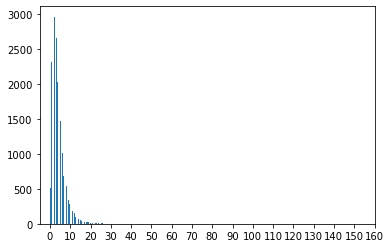

In [17]:
# Check the statistics for number of nodes

n = [len(g.nodes) for g in graphs]

fig = plt.figure()

# hist = np.histogram(n, bins=range(170))

plt.hist(n, bins=170) #, density=True)

plt.xticks(np.arange(0, 170, step=10))

print('max: ', max(n))
print('min: ', min(n))
print('99% percentile: ', np.percentile(n, 99))

max:  2028
min:  0
99% percentile:  47.0


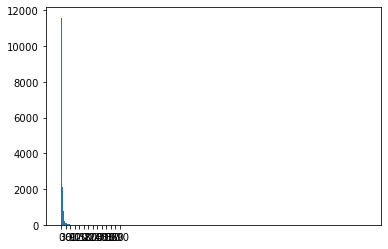

In [21]:
# Check the statistics for number of edges

e = [len(g.edges) for g in graphs]

# hist = np.histogram(e, bins=range(170))

fig = plt.figure()

plt.hist(e, bins=400) #, density=True)

plt.xticks(np.arange(0, 400, step=30))

print('max: ', max(e))
print('min: ', min(e))
print('99% percentile: ', np.percentile(e, 99))

In [22]:
# Check descriptor collisions for a given descriptor length

maximum = max(n)

print('100th percentile (maximum): ', maximum )

descriptors_max = [descriptor(g, N=maximum).tobytes() for g in graphs]

c_max = Counter(descriptors_max)

print('Unique descriptors: ', list(c_max.values()).count(1))

[(np.frombuffer(d, dtype=float), c) for d, c in c_max.most_common()]

100th percentile (maximum):  101
Unique descriptors:  3114


[(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  3715),
 (array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  2969),
 (array([1.41421356e+00, 1.41421356e+00, 2.77516890e-17, 0.000

In [30]:
# Check descriptor collisions for a given descriptor length

percent = 84

percentile = int(np.percentile(n,percent))

print(f'{percent}th percentile: ', percentile)

descriptors = [descriptor(g, N=percentile).tobytes() for g in graphs]

c_percentile = Counter(descriptors)

print('Unique descriptors: ', list(c_percentile.values()).count(1))

[(np.frombuffer(d, dtype=float), c) for d, c in c_percentile.most_common()]

84th percentile:  7
Unique descriptors:  3114


[(array([0., 0., 0., 0., 0., 0., 0.]), 3715),
 (array([1., 1., 0., 0., 0., 0., 0.]), 2969),
 (array([1.41421356e+00, 1.41421356e+00, 2.77516890e-17, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  958),
 (array([2., 1., 1., 0., 0., 0., 0.]), 859),
 (array([1.41421356, 1.41421356, 0.        , 0.        , 0.        ,
         0.        , 0.        ]),
  540),
 (array([1.73205081e+00, 1.73205081e+00, 1.99837971e-16, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  233),
 (array([3., 1., 1., 1., 0., 0., 0.]), 177),
 (array([2.17008649, 1.4811943 , 1.        , 0.31110782, 0.        ,
         0.        , 0.        ]),
  174),
 (array([1.61803399, 1.61803399, 0.61803399, 0.61803399, 0.        ,
         0.        , 0.        ]),
  149),
 (array([1., 1., 1., 1., 0., 0., 0.]), 132),
 (array([2.56155281e+00, 1.56155281e+00, 1.00000000e+00, 2.55566006e-17,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  111),
 (array([1.732050

In [31]:
unique_graphs = {d : g for g, d in zip(graphs, descriptors) if (count := c_percentile[d]) == 1}

print(len(unique_graphs))

c = Counter(map(lambda g: g.graph['label'], unique_graphs.values()))
print(len(c))

3114
222


In [ ]:
# Check the statistics of each label (plots histograms of deperecated index).

def plot_hist(graphs):
    results = defaultdict(list)

    for g in graphs: 
        results[g.graph['label']].append(index(g))

    fig = plt.figure()
    fig, axs = plt.subplots(len(results), 1, figsize=(14,800))
    
    for i, k in enumerate(results):
        plt.subplot(len(results), 1, i+1)
        
        axs[i].title.set_text(k)
        axs[i].hist(results[k], bins=100)

    plt.axis('off')

    plt.show()

In [ ]:
# plot_hist(graphs)

### Dump unique graphs with no descriptor collisions

In [ ]:
dump_graphs(unique_graphs, prefix="unique_")

## Database construction

### In-memory KD-tree for KNN descriptor queries

In [ ]:
DESCRIPTOR_DIMENSION = 11

In [ ]:
unique_graphs = load_graphs(prefix="unique_")
assert isinstance(unique_graphs, dict) 

In [ ]:
descriptors = np.array([np.frombuffer(d, dtype=float) for d in unique_graphs.keys()])

print(descriptors.shape)
descriptors

In [ ]:
# Build kd-tree
kd_tree = KDTree(descriptors)

In [ ]:
# Load graph from query image
svg = load('assets/svg/ant/270.svg')
display(svg)

In [ ]:
# Test query
query = extract_graph(svg, 'ant')
plot_graph(query)

#serialize_graph(query)

In [ ]:
# # Get query descriptor
# d = descriptor(query, N=DESCRIPTOR_DIMENSION)
# print(d)

# # Query KD-tree
# dd, ii = kd_tree.query(d, k=100)

# # Plot KNN
# for i in ii:
#     g = unique_graphs[descriptors[i].tobytes()]
#     plot_graph(g)
# # display(load(g.graph['filename']))

### Disk B+-tree mapping descriptors to graph data

In [ ]:
# Construct database for online use
db = construct_database(unique_graphs.values())

In [ ]:
# Test query
svg = load('assets/svg/ant/279.svg')

query = extract_graph(svg, 'ant')
plot_graph(query)

print(descriptor(query))

candidates = query_database(db, query)
print(candidates, "\n")

In [ ]:
db.close()

In [ ]:
# Reopen database

db = open_database()
candidates = query_database(db, query)
db.close()

candidates

# GRAPH MATCHING

In [ ]:
from src.matching import *

In [ ]:
G = nx.tutte_graph()
G.graph['positions'] = nx.spring_layout(G)

In [ ]:
nx.draw(G, pos=G.graph['positions'])

In [ ]:
ax1 = plt.subplot(1, 2, 1)
plot_graph(G)

ax2 = plt.subplot(1, 2, 2)
plot_graph(G)

In [ ]:
X = match(G, G)
print(X.shape)
X

In [ ]:
plot_mapping(X, G, G)